___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
try:
    import jupyter_black
    jupyter_black.load()
except ImportError:
    print('You can safely ignore this.')

You can safely ignore this.


In [2]:
# Reducing the msgs from TF

import os

# Set tensorflow log level to ignore INFOs.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_auc_score

# Uncomment the following lines if you want to suppress warnings:
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it to None to display all rows in the dataframe:
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe:
pd.set_option("display.max_columns", None)

In [4]:
df = pd.read_csv("Churn_Modelling.csv")

In [5]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2      0.000              1          1               1   
1       1  83807.860              1          0               1   
2       8 159660.800              3          1               0   
3       1      0.000              2          0               0   
4       2 125510.820              1          1               1   

   EstimatedSalary  Exited  
0       101348.880       1  
1       112542.580       0  
2       113931.570       1  
3        93826.630       0  
4        79084.100       0

In [6]:
df.shape

(10000, 14)

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.describe().T

count         mean       std          min          25%  \
RowNumber       10000.000     5000.500  2886.896        1.000     2500.750   
CustomerId      10000.000 15690940.569 71936.186 15565701.000 15628528.250   
CreditScore     10000.000      650.529    96.653      350.000      584.000   
Age             10000.000       38.922    10.488       18.000       32.000   
Tenure          10000.000        5.013     2.892        0.000        3.000   
Balance         10000.000    76485.889 62397.405        0.000        0.000   
NumOfProducts   10000.000        1.530     0.582        1.000        1.000   
HasCrCard       10000.000        0.706     0.456        0.000        0.000   
IsActiveMember  10000.000        0.515     0.500        0.000        0.000   
EstimatedSalary 10000.000   100090.240 57510.493       11.580    51002.110   
Exited          10000.000        0.204     0.403        0.000        0.000   

                         50%          75%          max  
RowNumber           5000.500     7500.250    10000.000  
CustomerId      15690738.000 15753233.750 15815690.000  
CreditScore          652.000      718.000      850.000  
Age                   37.000       44.000       92.000  
Tenure                 5.000        7.000       10.000  
Balance            97198.540   127644.240   250898.090  
NumOfProducts          1.000        2.000        4.000  
HasCrCard              1.000        1.000        1.000  
IsActiveMember         1.000        1.000        1.000  
EstimatedSalary   100193.915   149388.247   199992.480  
Exited                 0.000        0.000        1.000

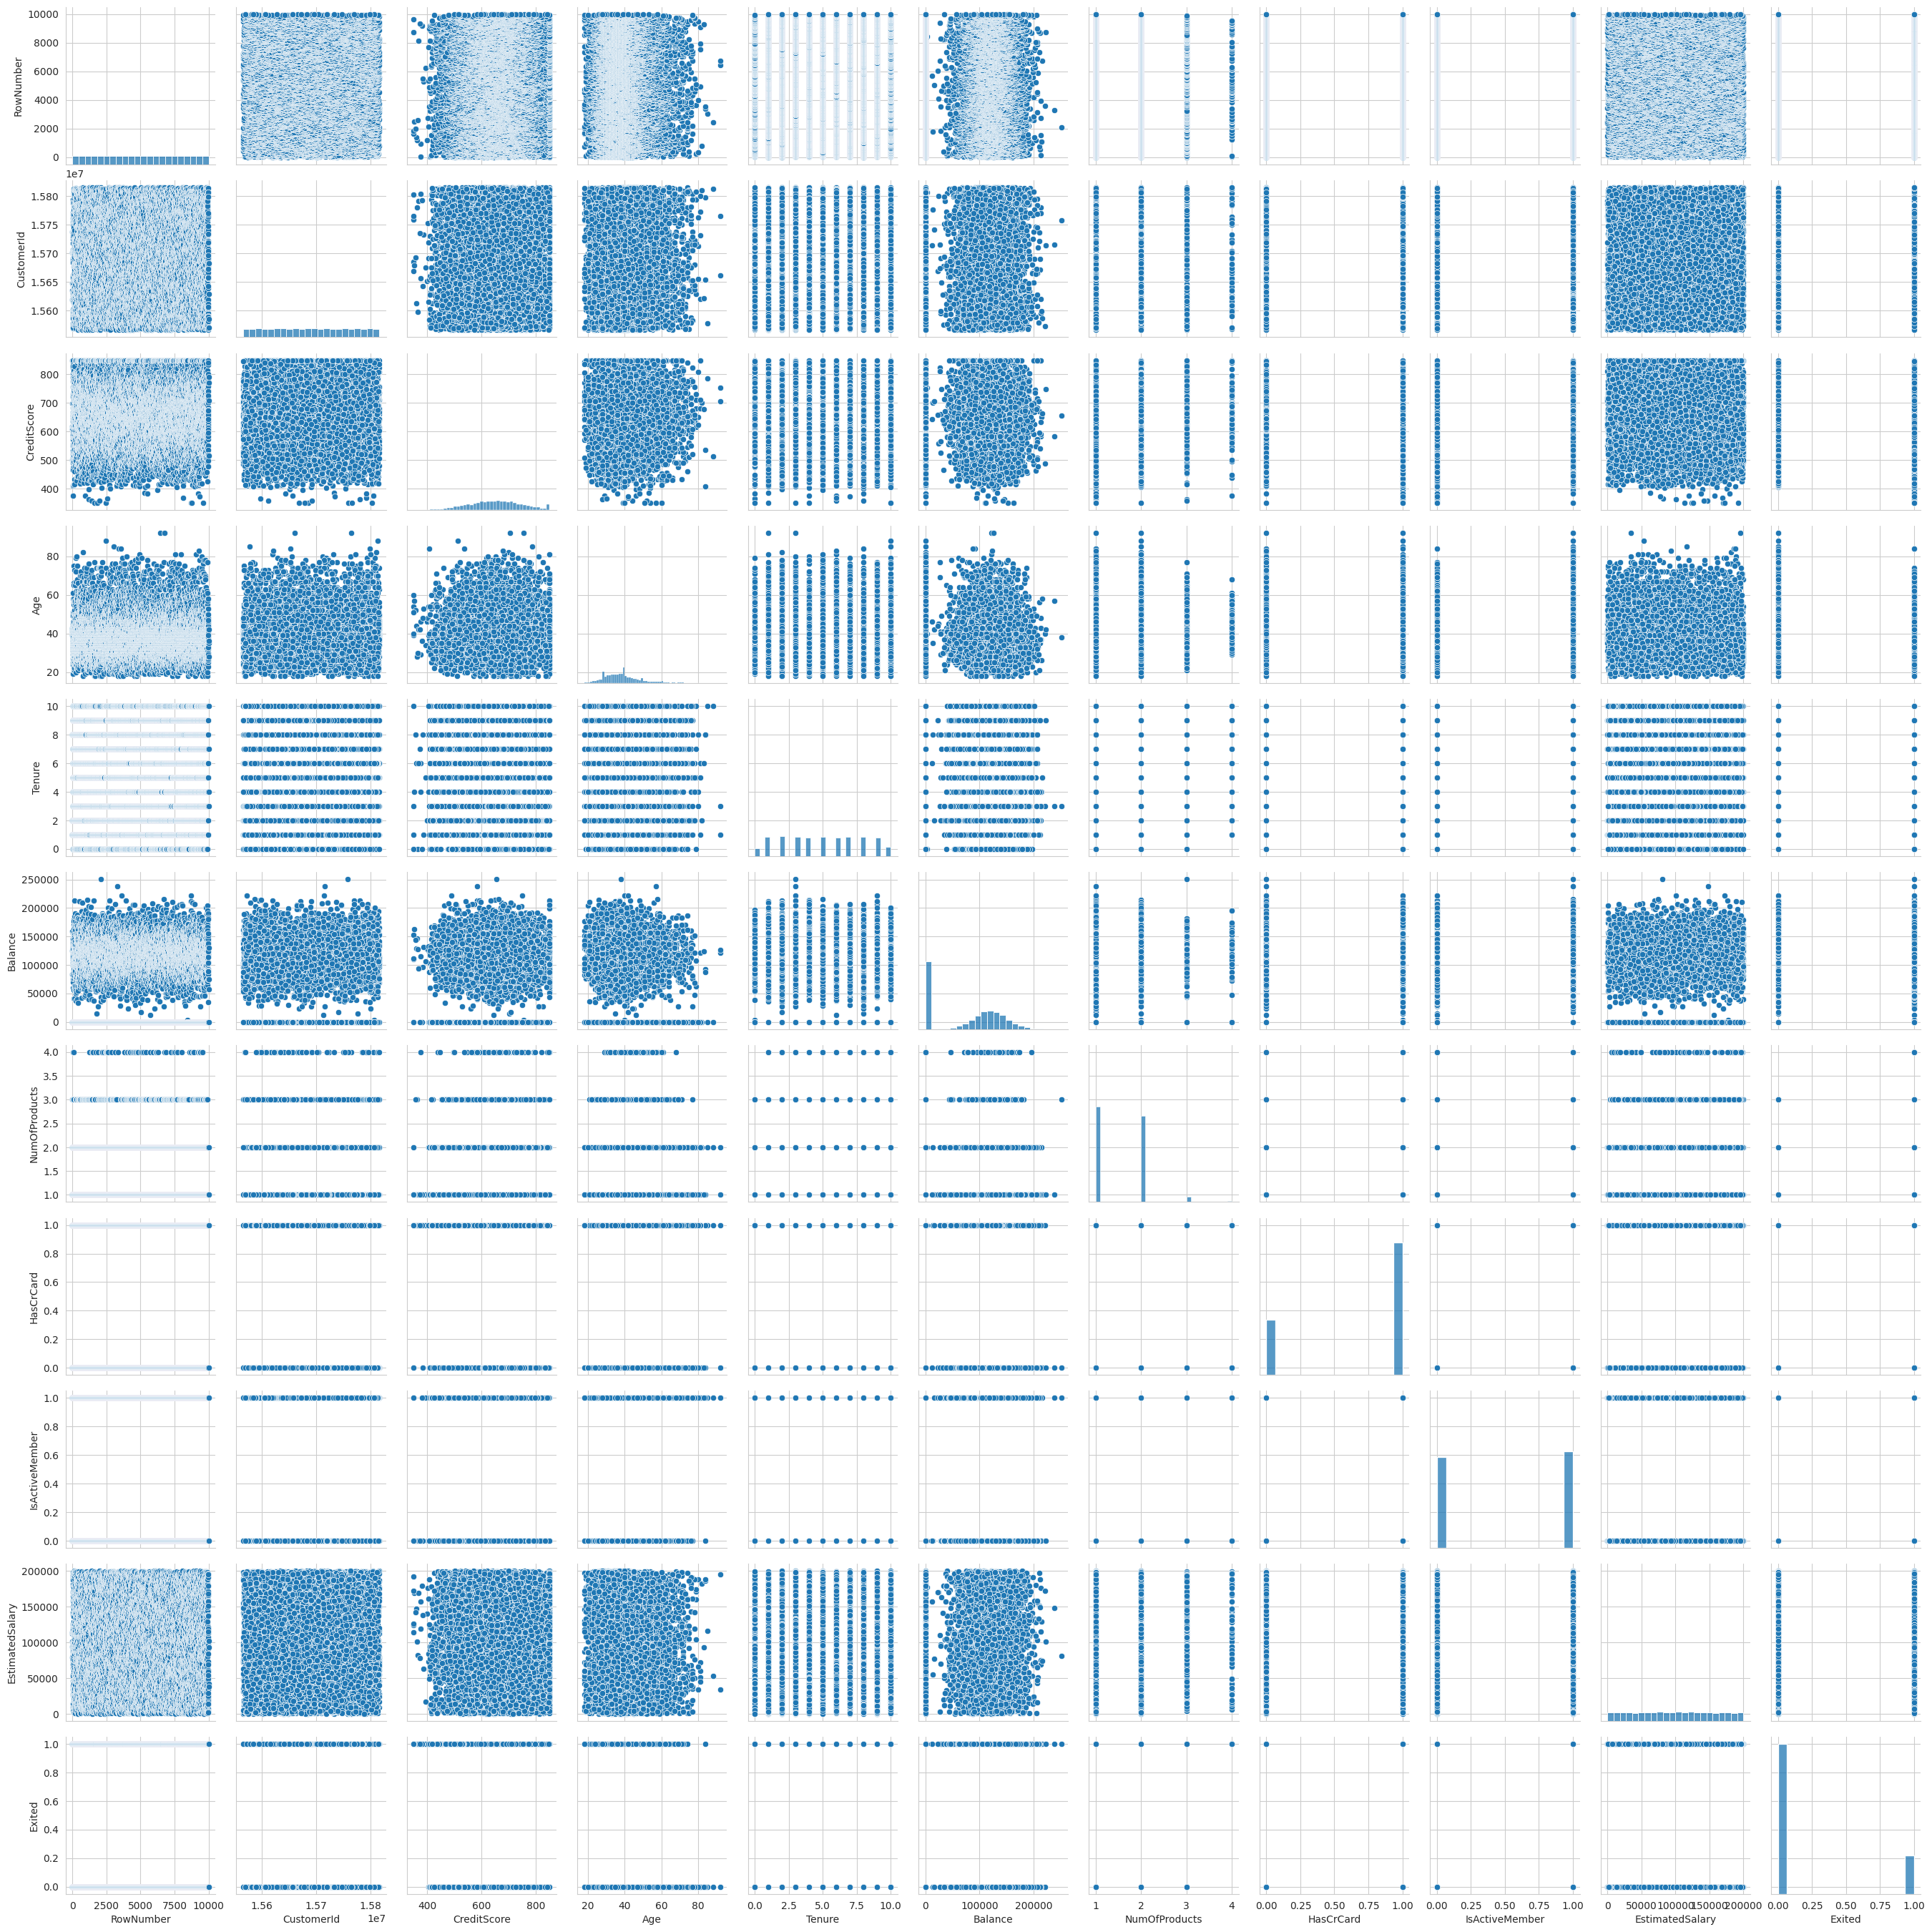

In [9]:
sns.pairplot(df)
plt.show()

In [10]:
df.describe(include=['object']).T

count unique     top  freq
Surname    10000   2932   Smith    32
Geography  10000      3  France  5014
Gender     10000      2    Male  5457

In [11]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [12]:
df.duplicated().sum()

0

### Correlations

In [13]:
df.corr()

RowNumber  CustomerId  CreditScore    Age  Tenure  Balance  \
RowNumber            1.000       0.004        0.006  0.001  -0.006   -0.009   
CustomerId           0.004       1.000        0.005  0.009  -0.015   -0.012   
CreditScore          0.006       0.005        1.000 -0.004   0.001    0.006   
Age                  0.001       0.009       -0.004  1.000  -0.010    0.028   
Tenure              -0.006      -0.015        0.001 -0.010   1.000   -0.012   
Balance             -0.009      -0.012        0.006  0.028  -0.012    1.000   
NumOfProducts        0.007       0.017        0.012 -0.031   0.013   -0.304   
HasCrCard            0.001      -0.014       -0.005 -0.012   0.023   -0.015   
IsActiveMember       0.012       0.002        0.026  0.085  -0.028   -0.010   
EstimatedSalary     -0.006       0.015       -0.001 -0.007   0.008    0.013   
Exited              -0.017      -0.006       -0.027  0.285  -0.014    0.119   

                 NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
RowNumber                0.007      0.001           0.012           -0.006   
CustomerId               0.017     -0.014           0.002            0.015   
CreditScore              0.012     -0.005           0.026           -0.001   
Age                     -0.031     -0.012           0.085           -0.007   
Tenure                   0.013      0.023          -0.028            0.008   
Balance                 -0.304     -0.015          -0.010            0.013   
NumOfProducts            1.000      0.003           0.010            0.014   
HasCrCard                0.003      1.000          -0.012           -0.010   
IsActiveMember           0.010     -0.012           1.000           -0.011   
EstimatedSalary          0.014     -0.010          -0.011            1.000   
Exited                  -0.048     -0.007          -0.156            0.012   

                 Exited  
RowNumber        -0.017  
CustomerId       -0.006  
CreditScore      -0.027  
Age               0.285  
Tenure           -0.014  
Balance           0.119  
NumOfProducts    -0.048  
HasCrCard        -0.007  
IsActiveMember   -0.156  
EstimatedSalary   0.012  
Exited            1.000

In [14]:
df.corr()["Exited"].sort_values()

IsActiveMember    -0.156
NumOfProducts     -0.048
CreditScore       -0.027
RowNumber         -0.017
Tenure            -0.014
HasCrCard         -0.007
CustomerId        -0.006
EstimatedSalary    0.012
Balance            0.119
Age                0.285
Exited             1.000
Name: Exited, dtype: float64

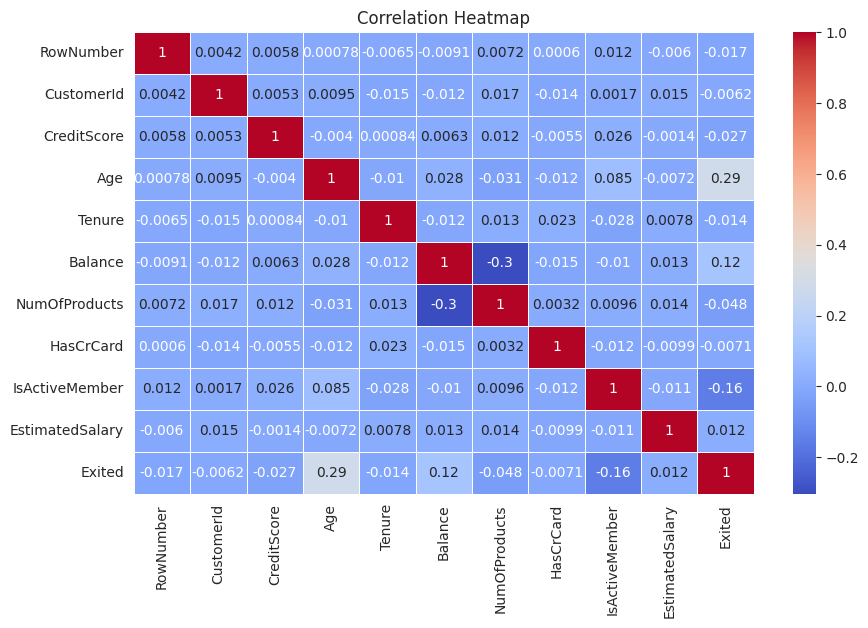

In [15]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
#Higher corellation is 0.30

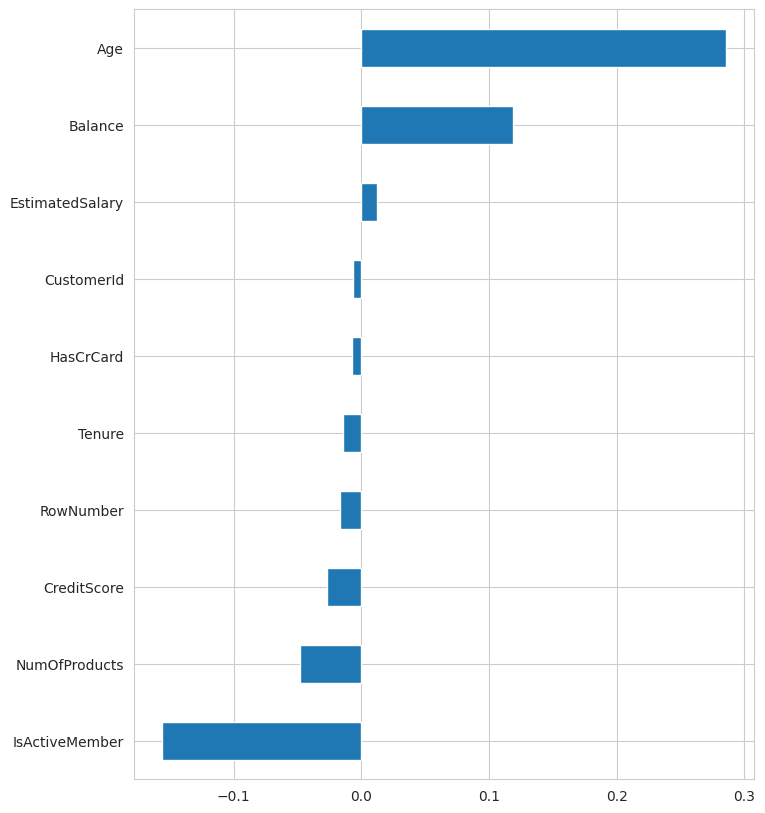

In [16]:
plt.figure(figsize=(8, 10))
(df.corr()["Exited"].sort_values().drop("Exited").plot(kind="barh"))
plt.show()

### Check for missing values

In [17]:
missing_values = df.isnull().sum()
missing_values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [18]:
df.isna().sum().sum()

0

### Drop the features that not suitable for modelling

In [19]:
# Droping unnecessary features and check the DF:
print(f"The  DataFrame BEFORE dropping unnecessary features: rows are {df.shape[0]} and columns are {df.shape[1]}")
df = df.drop(["CustomerId", "RowNumber", "Surname"], axis=1)

print(f"The  DataFrame AFTER dropping unnecessary features: rows are {df.shape[0]} and columns are {df.shape[1]}")

The  DataFrame BEFORE dropping unnecessary features: rows are 10000 and columns are 14
The  DataFrame AFTER dropping unnecessary features: rows are 10000 and columns are 11


In [20]:
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2      0.000              1   
1          608     Spain  Female   41       1  83807.860              1   
2          502    France  Female   42       8 159660.800              3   
3          699    France  Female   39       1      0.000              2   
4          850     Spain  Female   43       2 125510.820              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1       101348.880       1  
1          0               1       112542.580       0  
2          1               0       113931.570       1  
3          0               0        93826.630       0  
4          1               1        79084.100       0

### Assumption

In [21]:
df[(df["Tenure"]== 1) | (df["HasCrCard"] == 0)]

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
1             608     Spain  Female   41       1  83807.860              1   
3             699    France  Female   39       1      0.000              2   
8             501    France    Male   44       4 142051.070              2   
10            528    France    Male   31       6 102016.720              2   
13            549    France  Female   25       5      0.000              2   
...           ...       ...     ...  ...     ...        ...            ...   
9980          741     Spain    Male   35       6  74371.490              1   
9983          613    France    Male   40       4      0.000              1   
9986          673   Germany    Male   47       1 183579.540              2   
9994          800    France  Female   29       2      0.000              2   
9997          709    France  Female   36       7      0.000              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
1             0               1       112542.580       0  
3             0               0        93826.630       0  
8             0               1        74940.500       0  
10            0               0        80181.120       0  
13            0               0       190857.790       0  
...         ...             ...              ...     ...  
9980          0               0        99595.670       0  
9983          0               0       151325.240       0  
9986          0               1        34047.540       0  
9994          0               0       167773.550       0  
9997          0               1        42085.580       1  

[3646 rows x 11 columns]

In [22]:
df[(df["Balance"]== 0) & (df["IsActiveMember"] == 0)].value_counts().sum()

1744

In [23]:
df[(df["Balance"]> 0) & (df["IsActiveMember"] == 0)].value_counts().sum()

3105

In [24]:
df[(df["Balance"]> 0) & (df["IsActiveMember"] == 1)].value_counts().sum()

3278

In [25]:
df[(df["Balance"]> 0) & (df["Exited"] == 1)].value_counts().sum()

1537

In [26]:
df[(df["Balance"] == 0) & (df["Exited"] == 1)].value_counts().sum()

500

In [27]:
# No one with less than 300 credit score has a credit card
df[(df["CreditScore"] < 300) & (df["HasCrCard"] == 1)].value_counts().sum()

0

### visualization

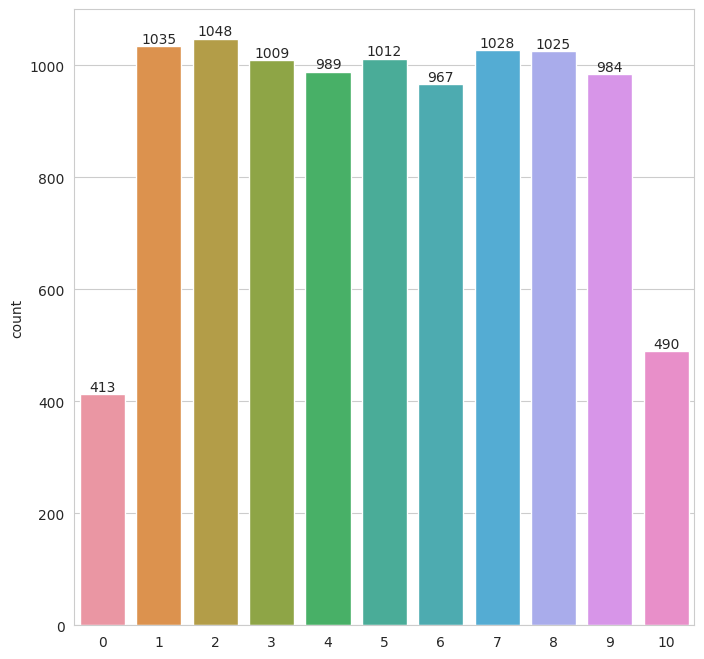

In [28]:
plt.figure(figsize=(8,8))
x = sns.countplot(x ='Tenure', data = df)
plt.title('')
plt.xlabel('')
x.bar_label(x.containers[0]);

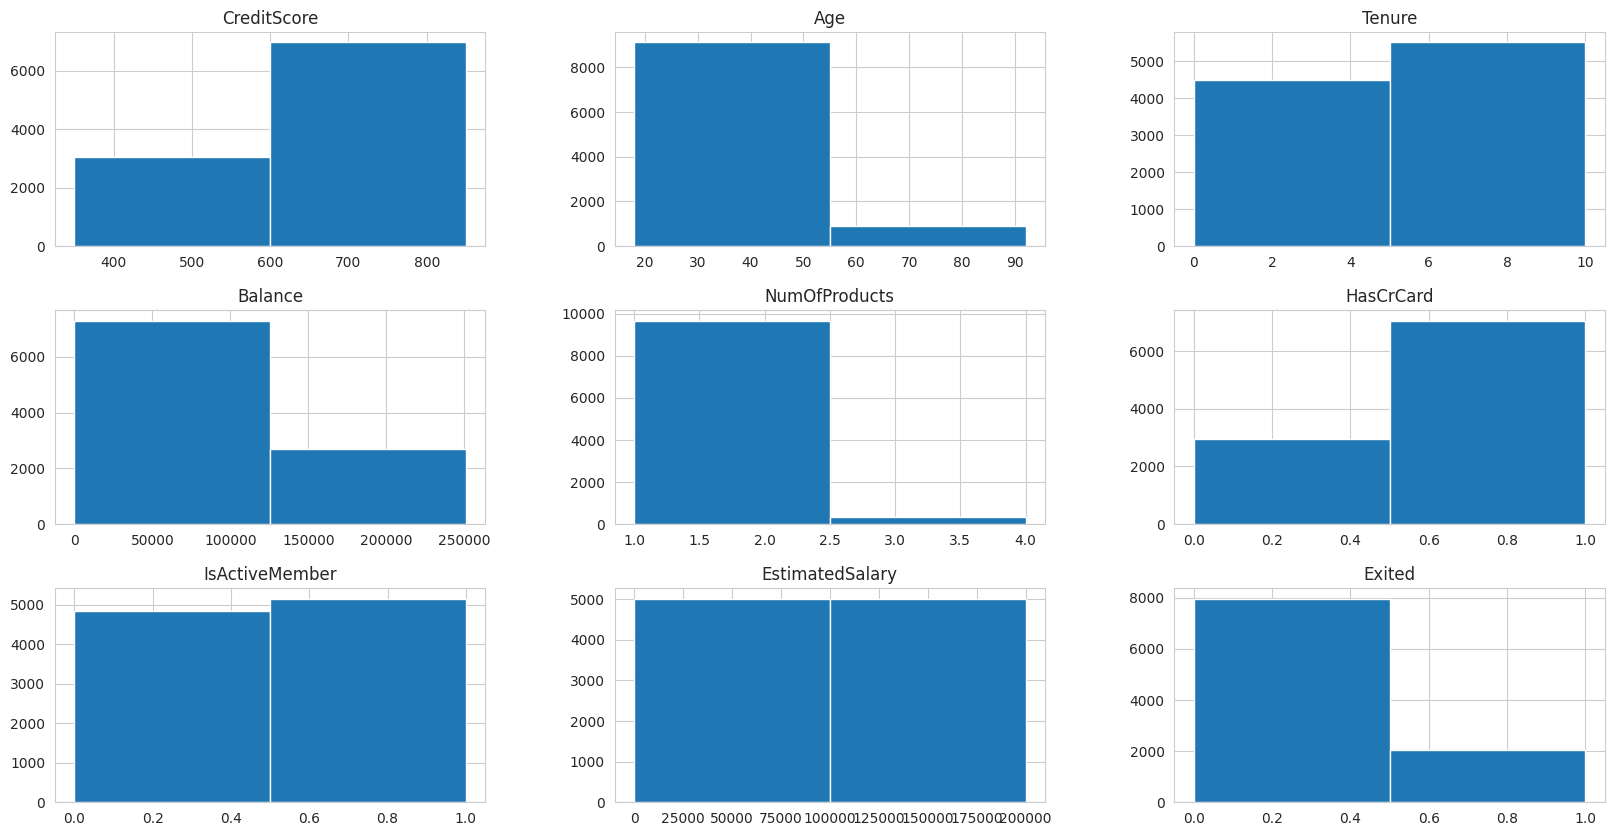

In [29]:
df.hist(bins=2, figsize=[20,10]);

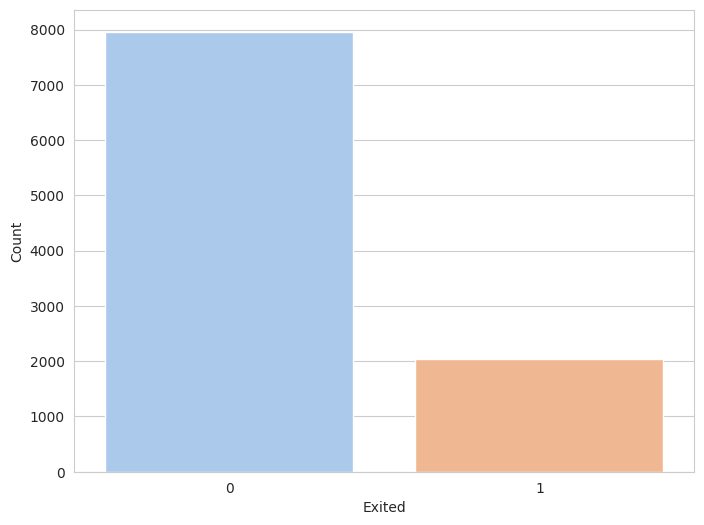

In [30]:
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.set_palette("pastel")
sns.countplot(data=df, x='Exited')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()
#imbalance data

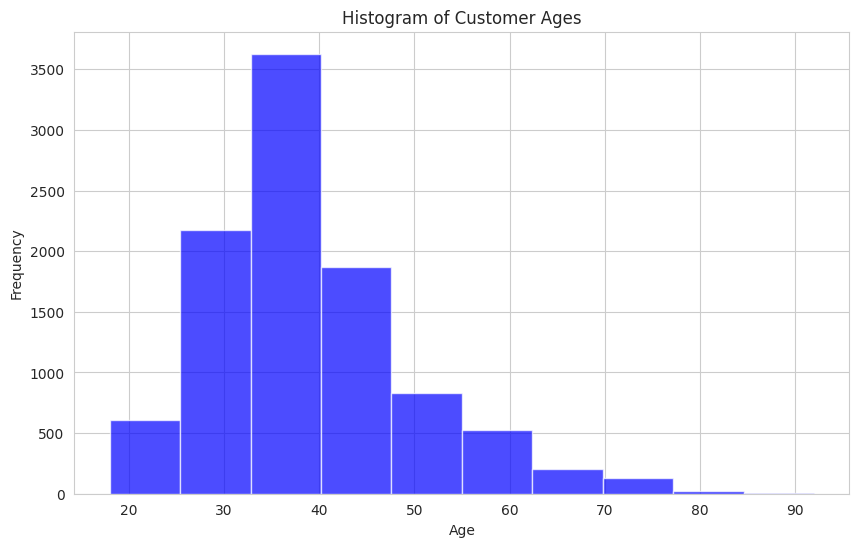

In [31]:
plt.hist(df['Age'], bins=10, color='blue', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Customer Ages')
plt.show()

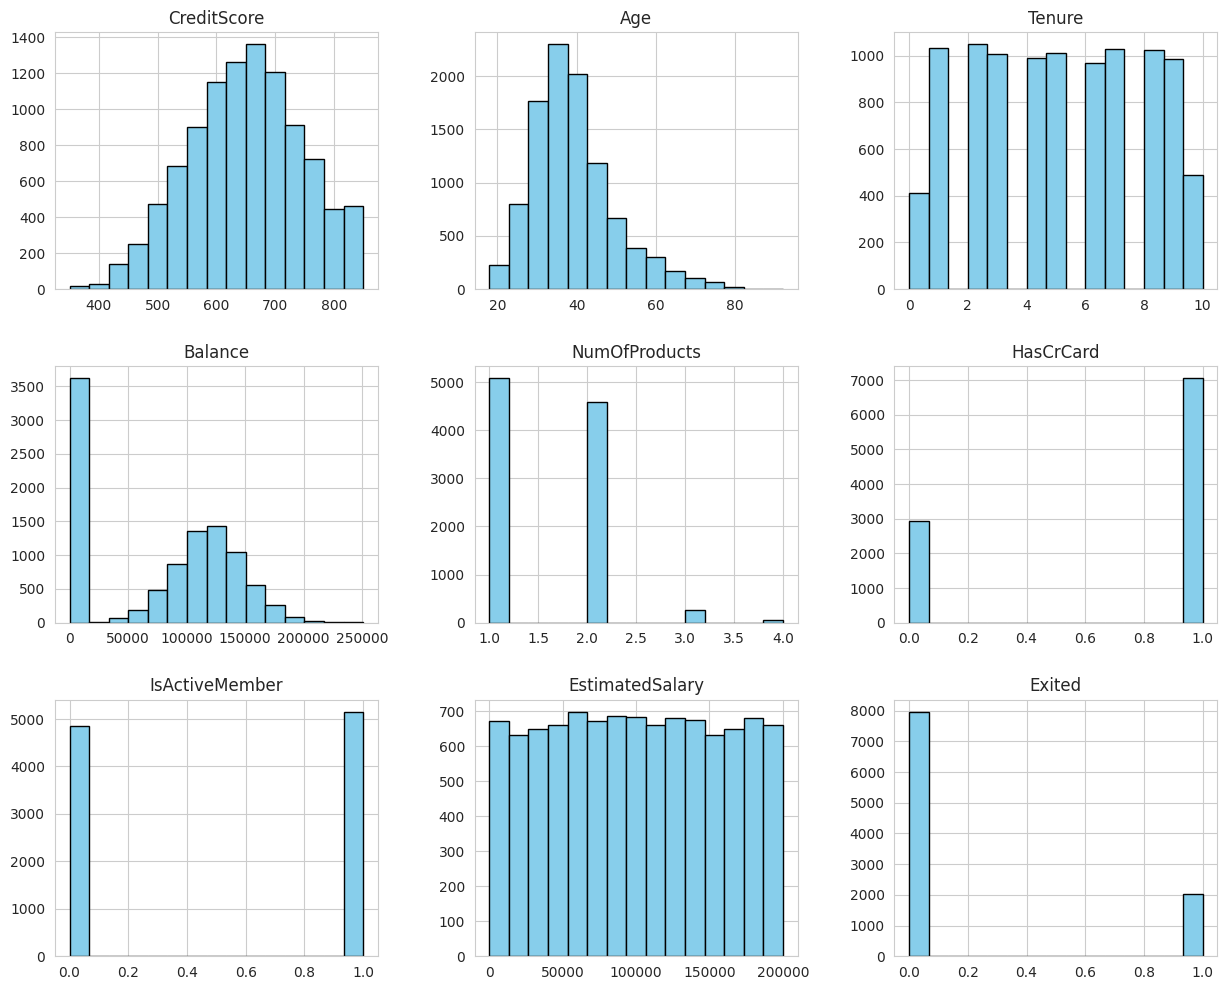

In [32]:
df.hist(figsize=(15, 12), bins=15, color='skyblue', edgecolor='black')
# plt.title("Exited")
plt.show()


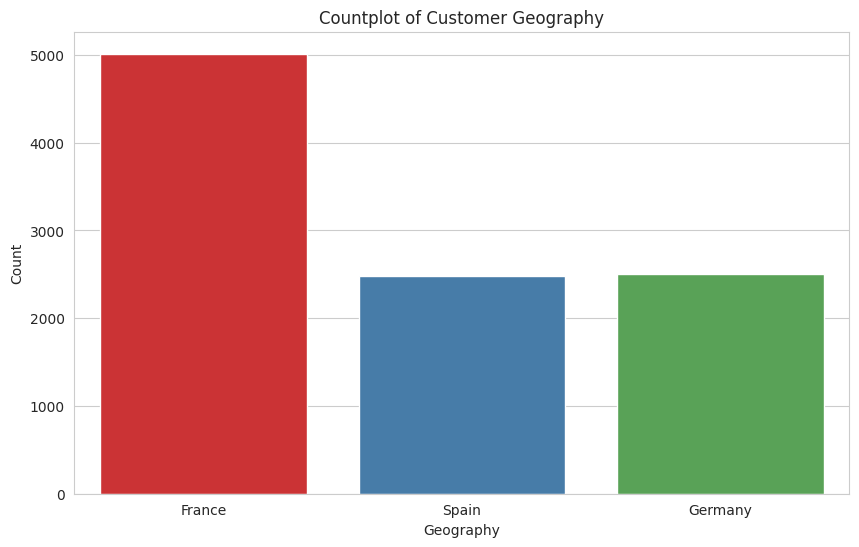

In [33]:
sns.countplot(data=df, x='Geography', palette='Set1')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.title('Countplot of Customer Geography')
plt.show()

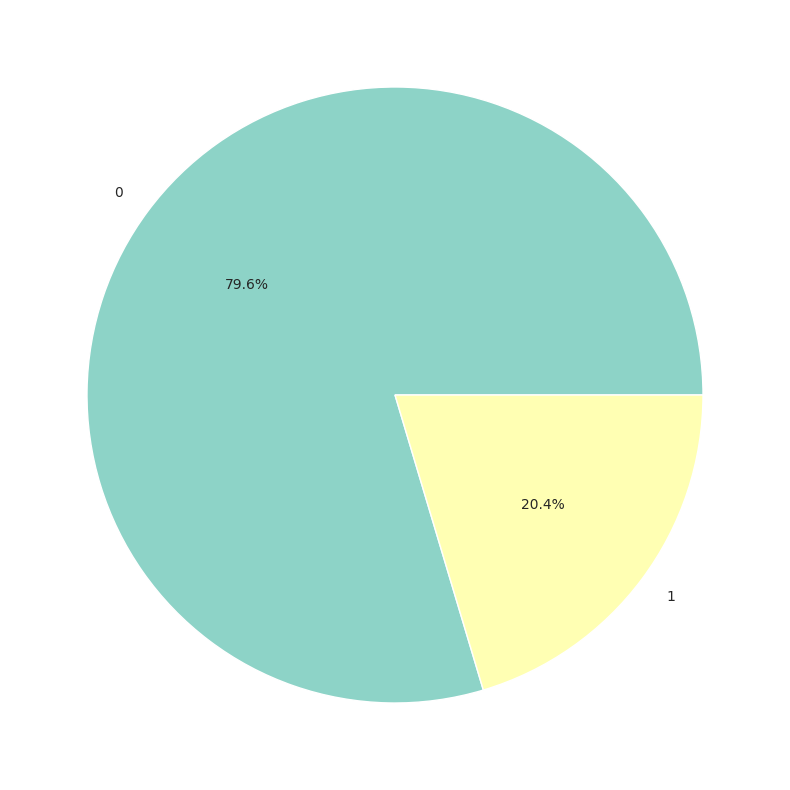

In [34]:
colors = sns.color_palette("Set3")
df["Exited"].value_counts().plot(kind="pie", autopct="%1.1f%%", figsize=(10, 10), colors=colors);
plt.ylabel("");

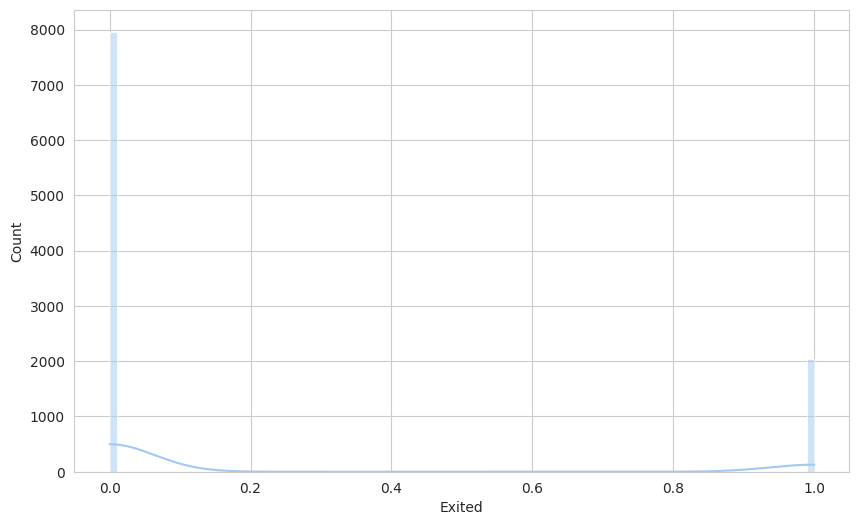

In [35]:
sns.histplot(df.Exited, bins=100, kde=True);

### Outliers

interactive(children=(Dropdown(description='model', options=('CreditScore', 'Age', 'Tenure', 'Balance', 'NumOf…

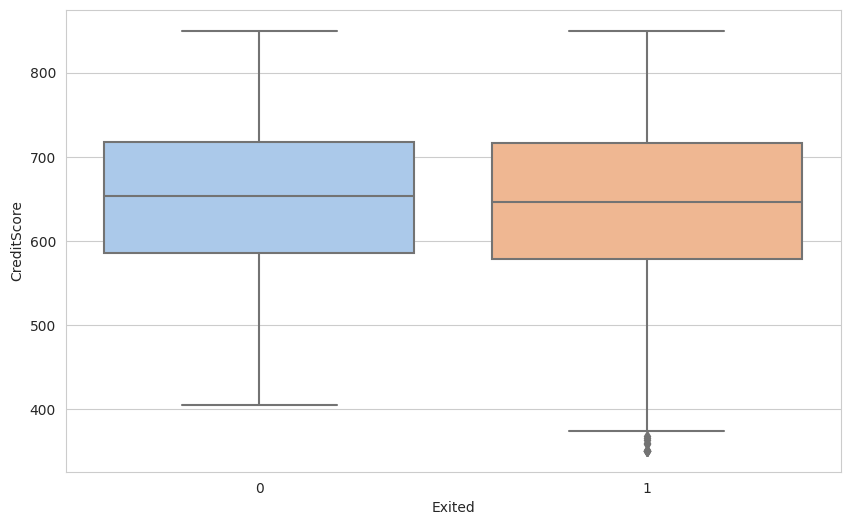

In [36]:
from ipywidgets import interact
def box_m(model):
    sns.boxplot(data = df, x= "Exited", y = model)

interactive_df = df.select_dtypes(include = 'number').columns[
    df.select_dtypes(include = 'number').columns != 'Exited']

interact(box_m, model=interactive_df);

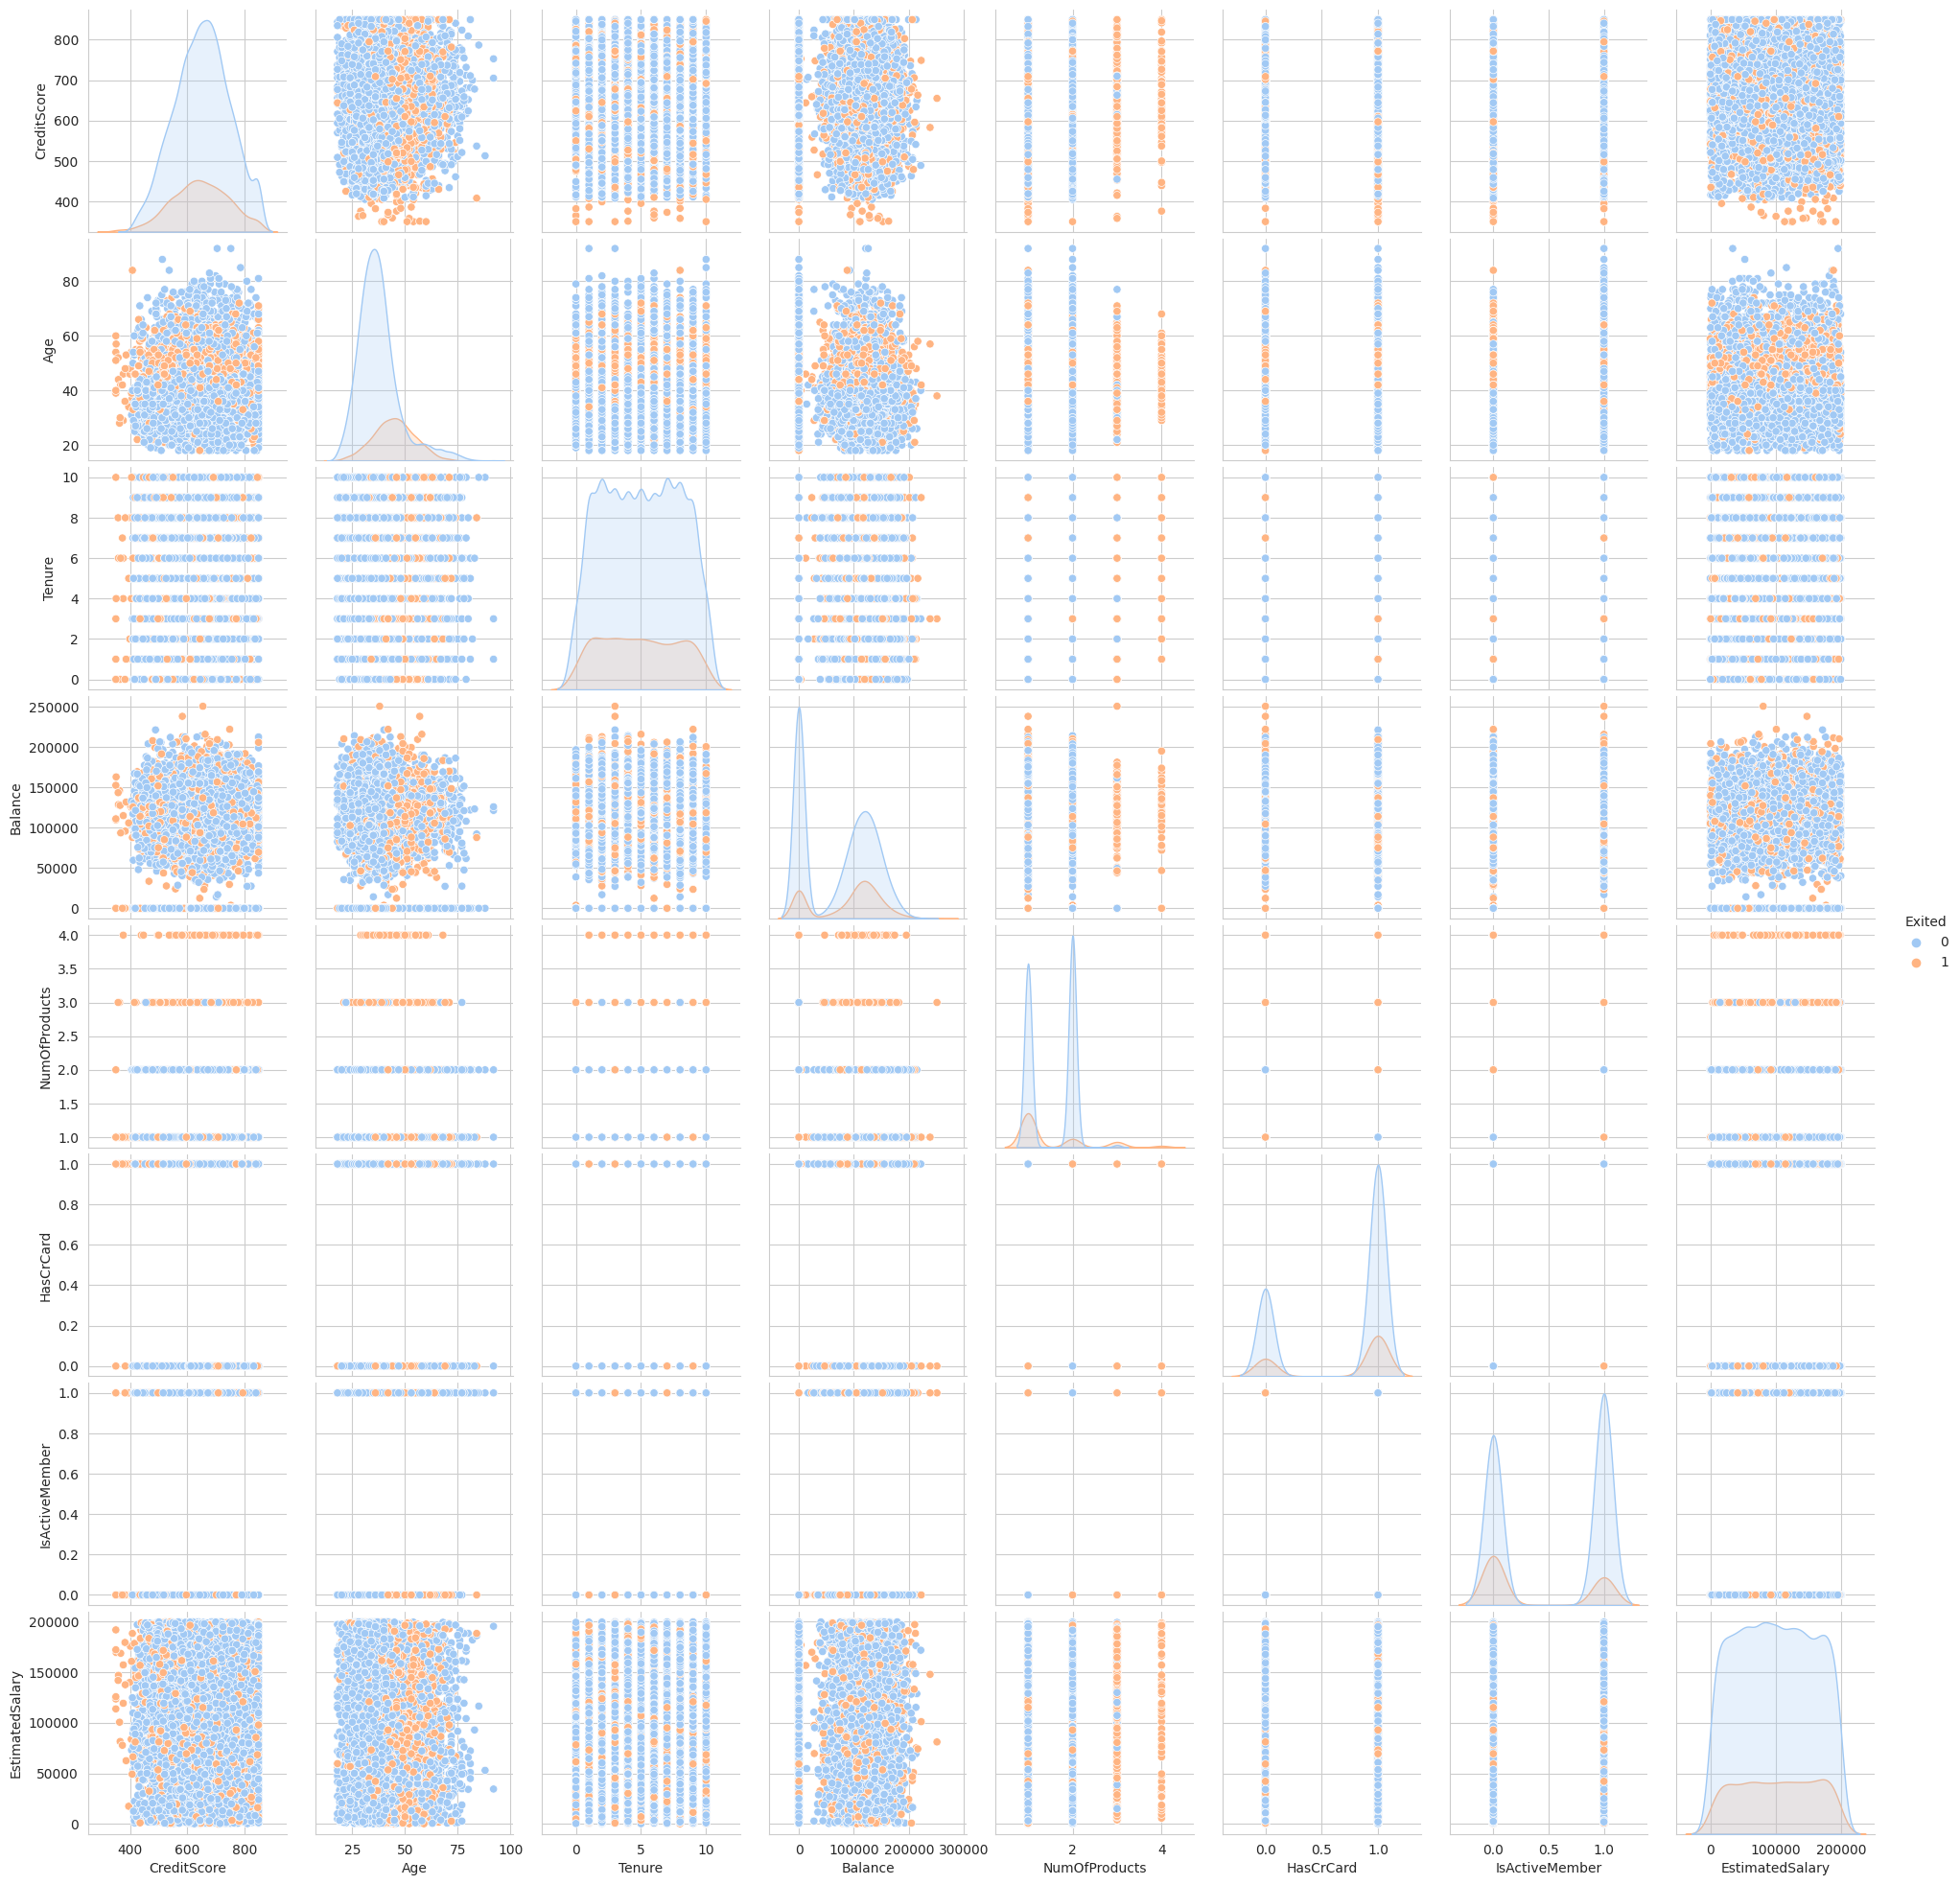

In [37]:
sns.pairplot(df, hue = 'Exited')

### Convert categorical variables to dummy variables

In [38]:
object_columns = df.select_dtypes(include=['object']).columns
for i in object_columns:
    print(f"{i:<30}:",df[i].nunique())

Geography                     : 3
Gender                        : 2


In [39]:
# Encoding process
df["Gender"] = df["Gender"].map({"Female":0, "Male": 1})

In [40]:
df["Gender"]

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Gender, Length: 10000, dtype: int64

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
MinMax_Scaler = MinMaxScaler()

In [43]:
cols_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [44]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [45]:
column_trans = make_column_transformer((
               OneHotEncoder( handle_unknown='ignore',
                              sparse_output=False),
                              ["Geography"]), (MinMax_Scaler, cols_scale),
                              remainder = 'passthrough',
                              verbose_feature_names_out=False)

In [46]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

# Preprocessing of Data
- Train | Test Split, Scalling

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X = df.drop(columns=["Exited"])
y = df.Exited

In [49]:
X

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France       0   42       2      0.000              1   
1             608     Spain       0   41       1  83807.860              1   
2             502    France       0   42       8 159660.800              3   
3             699    France       0   39       1      0.000              2   
4             850     Spain       0   43       2 125510.820              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France       1   39       5      0.000              2   
9996          516    France       1   35      10  57369.610              1   
9997          709    France       0   36       7      0.000              1   
9998          772   Germany       1   42       3  75075.310              2   
9999          792    France       0   28       4 130142.790              1   

      HasCrCard  IsActiveMember  EstimatedSalary  
0             1               1       101348.880  
1             0               1       112542.580  
2             1               0       113931.570  
3             0               0        93826.630  
4             1               1        79084.100  
...         ...             ...              ...  
9995          1               0        96270.640  
9996          1               1       101699.770  
9997          0               1        42085.580  
9998          1               0        92888.520  
9999          1               0        38190.780  

[10000 rows x 10 columns]

In [50]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.15, random_state=42
)

In [52]:
X_train,X_val,y_train,y_val = train_test_split(
    X_train, y_train,test_size=0.10,stratify=y_train,random_state=42
)

In [53]:
X_train = column_trans.fit_transform(X_train)
X_test = column_trans.transform(X_test)
X_val= column_trans.transform(X_val)

In [54]:
X_train.shape

(7650, 12)

In [55]:
X_test.shape

(1500, 12)

In [56]:
X_val.shape

(850, 12)

In [57]:
X_train # Between 0 to 1 after scaler

array([[0., 0., 1., ..., 1., 1., 1.],
       [1., 0., 0., ..., 1., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 1., 1.],
       [0., 1., 0., ..., 1., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [58]:
X_test # Between 0 to 1 after scaler

array([[1., 0., 0., ..., 0., 1., 1.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 1.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 1.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [59]:
X_val # Between 0 to 1 after scaler

array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 1., 1.],
       [0., 1., 0., ..., 1., 1., 1.],
       [1., 0., 0., ..., 0., 1., 1.]])

# Modelling & Model Performance

In [60]:
def seedsetter():
    SEED = 42
    import os
    import random
    os.environ["TF_DETERMINISTIC_OPS"] = "1"
    tf.keras.utils.set_random_seed(SEED)
    os.environ['PYTHONHASHSEED']=str(SEED)
    random.seed(SEED)
    np.random.seed(SEED)
    tf.random.set_seed(SEED)

In [61]:
def roc_auc_plot(y_train, pred_train, y_test, pred_test):
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_train, pred_train)
    fpr_keras_test, tpr_keras_test, thresholds_keras_test = roc_curve(y_test, pred_test)


    auc_keras = auc(fpr_keras, tpr_keras)
    auc_keras_test = auc(fpr_keras_test, tpr_keras_test)


    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_keras, tpr_keras, label='train (area = {:.3f})'.format(auc_keras))
    plt.plot(fpr_keras_test, tpr_keras_test, label='val (area = {:.3f})'.format(auc_keras_test))

    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

## without class_weigth

### Create The Model

In [62]:
#I try with 3 and 4 layers and change the number of neurons
#I try to change the batch size also 32, 64, and 128
# tf.random.set_seed(42)

model = Sequential()

model.add(Dense(20, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics="Recall")

In [63]:
model.fit(
    x=X_train, y=y_train, validation_data=(X_val , y_val), batch_size=64, epochs=500, verbose=1
)

Epoch 1/500
120/120 [==============================] - 2s 7ms/step - loss: 0.5402 - recall: 0.0809 - val_loss: 0.4729 - val_recall: 0.0000e+00
Epoch 2/500
120/120 [==============================] - 0s 3ms/step - loss: 0.4644 - recall: 0.0148 - val_loss: 0.4532 - val_recall: 0.0347
Epoch 3/500
120/120 [==============================] - 0s 2ms/step - loss: 0.4487 - recall: 0.0976 - val_loss: 0.4396 - val_recall: 0.1676
Epoch 4/500
120/120 [==============================] - 0s 3ms/step - loss: 0.4327 - recall: 0.1662 - val_loss: 0.4285 - val_recall: 0.2254
Epoch 5/500
120/120 [==============================] - 0s 3ms/step - loss: 0.4173 - recall: 0.2298 - val_loss: 0.4127 - val_recall: 0.2370
Epoch 6/500
120/120 [==============================] - 0s 3ms/step - loss: 0.4015 - recall: 0.2715 - val_loss: 0.3985 - val_recall: 0.3642
Epoch 7/500
120/120 [==============================] - 0s 2ms/step - loss: 0.3870 - recall: 0.3132 - val_loss: 0.3838 - val_recall: 0.3815
Epoch 8/500
120/120 [==

In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                260       
                                                                 
 dense_1 (Dense)             (None, 16)                336       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 741 (2.89 KB)
Trainable params: 741 (2.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

loss  recall  val_loss  val_recall
0 0.540   0.081     0.473       0.000
1 0.464   0.015     0.453       0.035
2 0.449   0.098     0.440       0.168
3 0.433   0.166     0.428       0.225
4 0.417   0.230     0.413       0.237

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

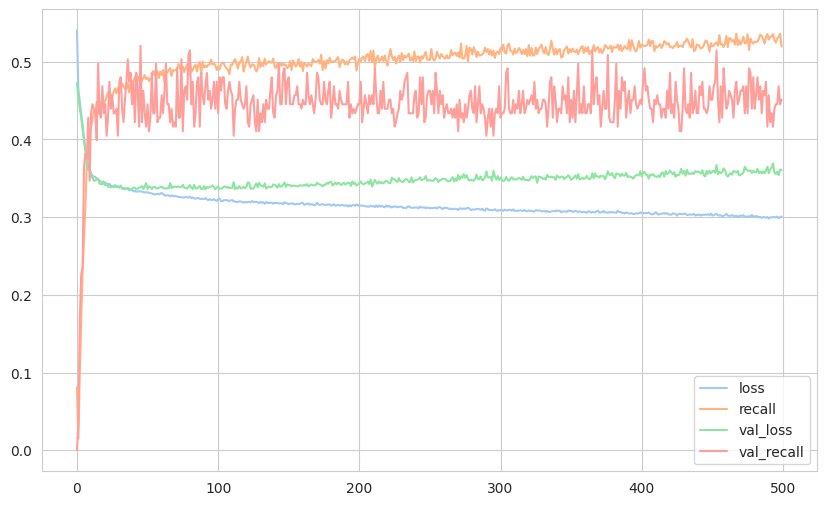

In [68]:
loss_df.plot()
plt.show()

In [67]:
variable = model.evaluate(X_test, y_test, verbose=0)

In [69]:
loss,Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", Recall)

loss:  0.3645138442516327
recall:  0.46405228972435


In [70]:
print("Train")
y_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print("Test")
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("-------")
#Overfitting

Train
240/240 [==============================] - 1s 2ms/step
[[5854  238]
 [ 709  849]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.93      6092
           1       0.78      0.54      0.64      1558

    accuracy                           0.88      7650
   macro avg       0.84      0.75      0.78      7650
weighted avg       0.87      0.88      0.87      7650

Test
47/47 [==============================] - 0s 3ms/step
[[1128   66]
 [ 164  142]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      1194
           1       0.68      0.46      0.55       306

    accuracy                           0.85      1500
   macro avg       0.78      0.70      0.73      1500
weighted avg       0.83      0.85      0.84      1500

-------


Text(95.72222222222221, 0.5, 'Truth')

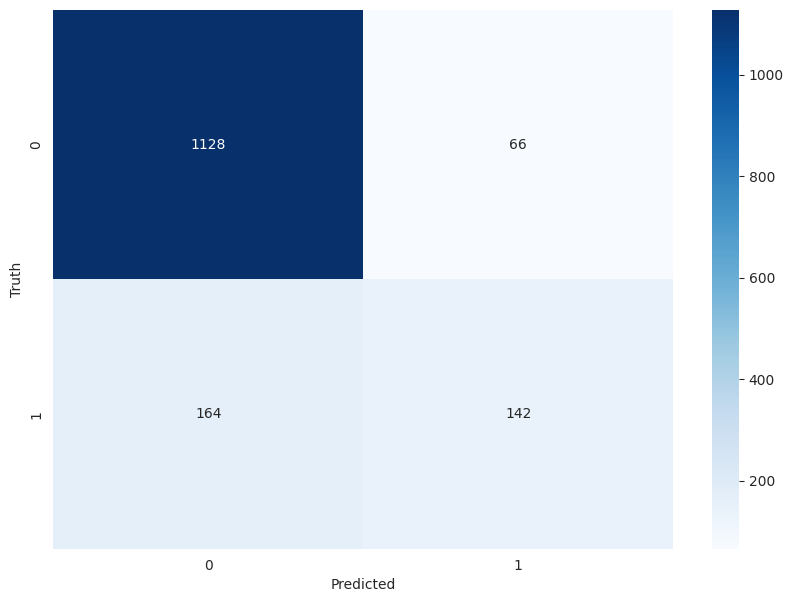

In [71]:
cm = tf.math. confusion_matrix(labels= y_test, predictions= y_pred)
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot= True, fmt= 'd', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [72]:
roc_auc_score(y_test, y_pred)

0.7043879528360758

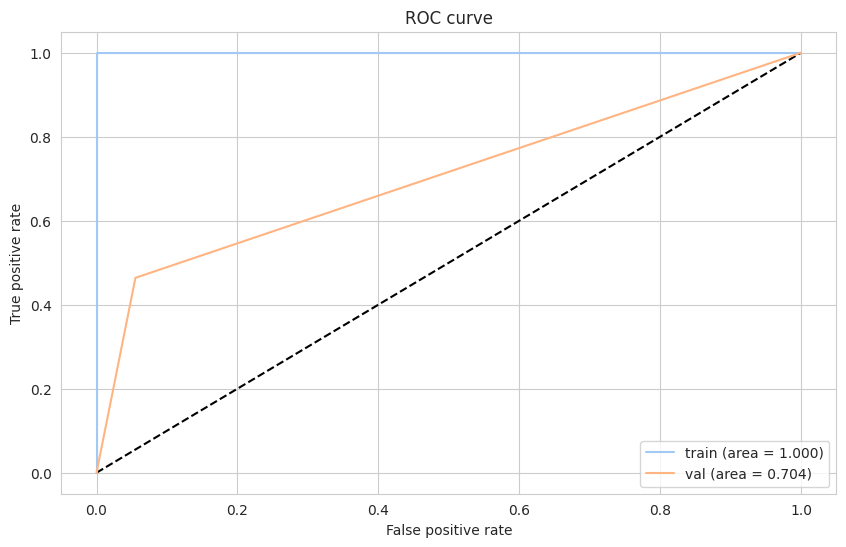

In [73]:
roc_auc_plot(y_train, y_train,y_test, y_pred)

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [74]:
from sklearn.utils.class_weight import compute_class_weight

In [75]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}

In [76]:
class_weights

{0: 0.6278726198292843, 1: 2.4550706033376124}

In [77]:
model = Sequential()

model.add(Dense(20, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics="Recall")

In [78]:
model.fit(x = X_train, y = y_train, validation_data=(X_val,y_val), batch_size = 64, epochs = 500, class_weight=class_weights)

Epoch 1/500
120/120 [==============================] - 2s 8ms/step - loss: 0.6544 - recall: 0.5918 - val_loss: 0.6455 - val_recall: 0.6358
Epoch 2/500
120/120 [==============================] - 0s 4ms/step - loss: 0.6272 - recall: 0.6220 - val_loss: 0.6256 - val_recall: 0.6416
Epoch 3/500
120/120 [==============================] - 0s 2ms/step - loss: 0.6075 - recall: 0.6585 - val_loss: 0.5805 - val_recall: 0.6243
Epoch 4/500
120/120 [==============================] - 0s 3ms/step - loss: 0.5858 - recall: 0.6829 - val_loss: 0.5779 - val_recall: 0.6821
Epoch 5/500
120/120 [==============================] - 0s 3ms/step - loss: 0.5691 - recall: 0.7054 - val_loss: 0.6060 - val_recall: 0.7283
Epoch 6/500
120/120 [==============================] - 0s 3ms/step - loss: 0.5576 - recall: 0.7118 - val_loss: 0.5846 - val_recall: 0.7225
Epoch 7/500
120/120 [==============================] - 0s 3ms/step - loss: 0.5464 - recall: 0.7195 - val_loss: 0.5549 - val_recall: 0.7110
Epoch 8/500
120/120 [======

In [79]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 20)                260       
                                                                 
 dense_5 (Dense)             (None, 16)                336       
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 741 (2.89 KB)
Trainable params: 741 (2.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [80]:
loss_weight = pd.DataFrame(model.history.history)
loss_weight.head()

loss  recall  val_loss  val_recall
0 0.654   0.592     0.646       0.636
1 0.627   0.622     0.626       0.642
2 0.607   0.659     0.580       0.624
3 0.586   0.683     0.578       0.682
4 0.569   0.705     0.606       0.728

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

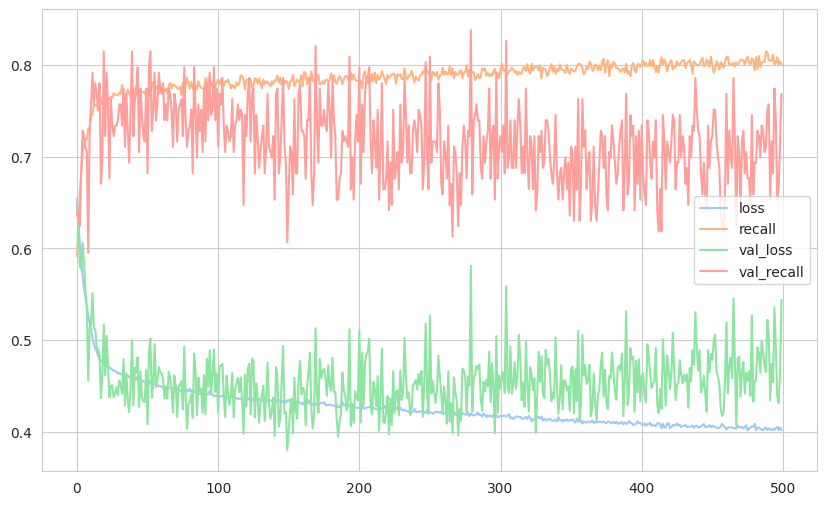

In [81]:
loss_weight.plot()
plt.show()

In [82]:
y_predit = model.evaluate(X_test, y_test, verbose=0)

In [83]:
loss,Recall= model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", Recall)

loss:  0.5790629982948303
recall:  0.7679738402366638


In [84]:
print("Train")
y_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print("Test")
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("-------")

Train
240/240 [==============================] - 0s 1ms/step
[[4546 1546]
 [ 214 1344]]
              precision    recall  f1-score   support

           0       0.96      0.75      0.84      6092
           1       0.47      0.86      0.60      1558

    accuracy                           0.77      7650
   macro avg       0.71      0.80      0.72      7650
weighted avg       0.86      0.77      0.79      7650

Test
47/47 [==============================] - 0s 3ms/step
[[855 339]
 [ 71 235]]
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1194
           1       0.41      0.77      0.53       306

    accuracy                           0.73      1500
   macro avg       0.67      0.74      0.67      1500
weighted avg       0.82      0.73      0.75      1500

-------


Text(95.72222222222221, 0.5, 'Truth')

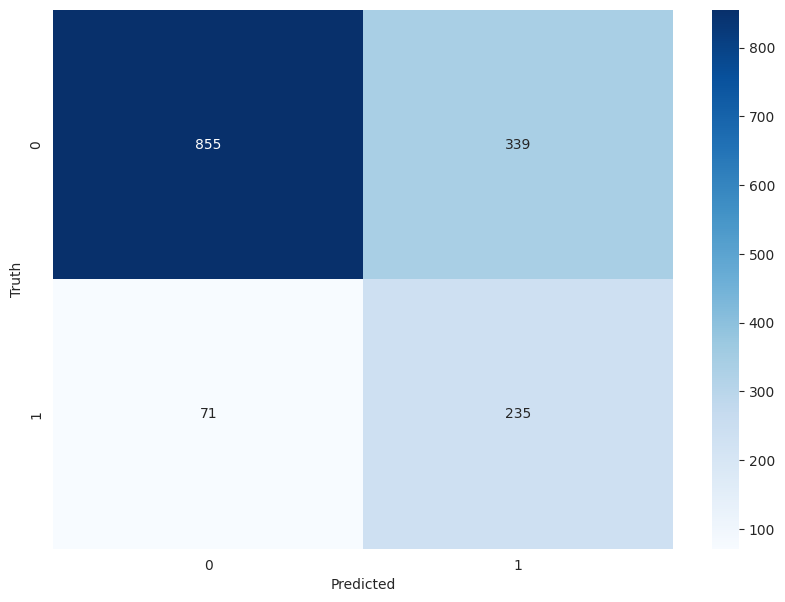

In [85]:
cm = tf.math. confusion_matrix(labels= y_test, predictions= y_pred)
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot= True, fmt= 'd', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [86]:
roc_auc_score(y_test, y_pred)

0.7420271291096002

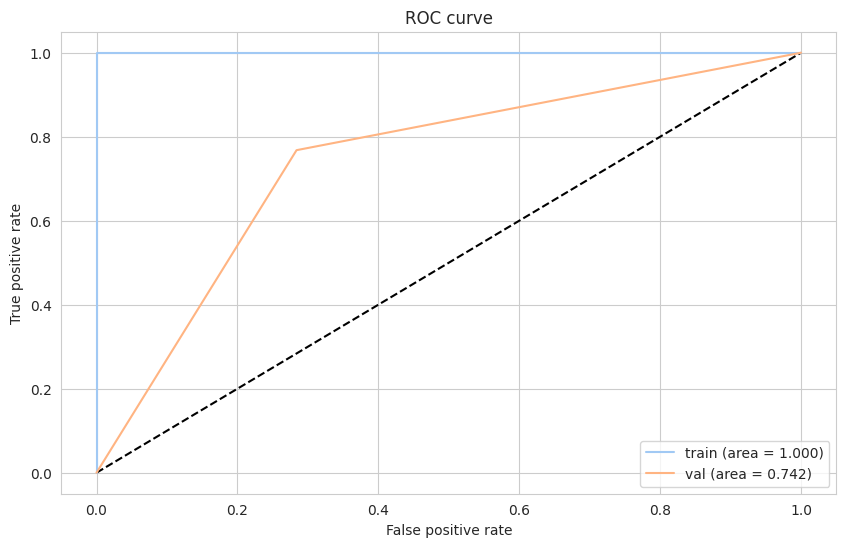

In [87]:
roc_auc_plot(y_train, y_train,y_test, y_pred)

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [88]:
model = Sequential()

model.add(Dense(20, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.02)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics="Recall")

In [89]:
model.fit(x = X_train, y = y_train, validation_data=(X_val,y_val), batch_size = 64, epochs = 500, class_weight=class_weights)

Epoch 1/500
120/120 [==============================] - 2s 4ms/step - loss: 0.6215 - recall: 0.6335 - val_loss: 0.7031 - val_recall: 0.8671
Epoch 2/500
120/120 [==============================] - 0s 3ms/step - loss: 0.5355 - recall: 0.7285 - val_loss: 0.6732 - val_recall: 0.8555
Epoch 3/500
120/120 [==============================] - 0s 3ms/step - loss: 0.5171 - recall: 0.7426 - val_loss: 0.4014 - val_recall: 0.6243
Epoch 4/500
120/120 [==============================] - 0s 3ms/step - loss: 0.5062 - recall: 0.7567 - val_loss: 0.4855 - val_recall: 0.7457
Epoch 5/500
120/120 [==============================] - 0s 3ms/step - loss: 0.4891 - recall: 0.7381 - val_loss: 0.5618 - val_recall: 0.8497
Epoch 6/500
120/120 [==============================] - 0s 3ms/step - loss: 0.4812 - recall: 0.7356 - val_loss: 0.4417 - val_recall: 0.6821
Epoch 7/500
120/120 [==============================] - 0s 3ms/step - loss: 0.4812 - recall: 0.7330 - val_loss: 0.4388 - val_recall: 0.7283
Epoch 8/500
120/120 [======

In [90]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

loss  recall  val_loss  val_recall
0 0.621   0.634     0.703       0.867
1 0.536   0.728     0.673       0.855
2 0.517   0.743     0.401       0.624
3 0.506   0.757     0.485       0.746
4 0.489   0.738     0.562       0.850

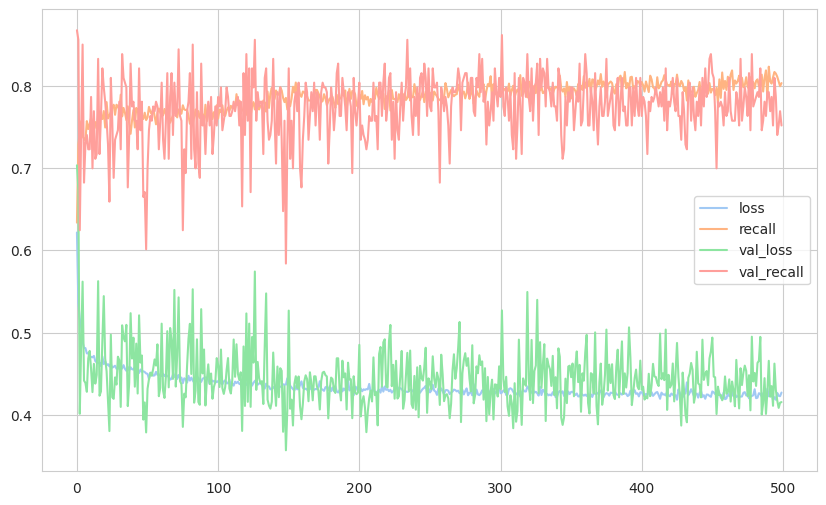

In [91]:
loss_df.plot()
plt.show()

In [92]:
y_predic = model.evaluate(X_test, y_test, verbose=0)

In [93]:
loss,Recall= model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", Recall)

loss:  0.43655160069465637
recall:  0.7483659982681274


In [94]:
print("Train")
y_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print("Test")
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("-------")

Train
240/240 [==============================] - 0s 2ms/step
[[5069 1023]
 [ 356 1202]]
              precision    recall  f1-score   support

           0       0.93      0.83      0.88      6092
           1       0.54      0.77      0.64      1558

    accuracy                           0.82      7650
   macro avg       0.74      0.80      0.76      7650
weighted avg       0.85      0.82      0.83      7650

Test
47/47 [==============================] - 0s 2ms/step
[[965 229]
 [ 77 229]]
              precision    recall  f1-score   support

           0       0.93      0.81      0.86      1194
           1       0.50      0.75      0.60       306

    accuracy                           0.80      1500
   macro avg       0.71      0.78      0.73      1500
weighted avg       0.84      0.80      0.81      1500

-------


Text(95.72222222222221, 0.5, 'Truth')

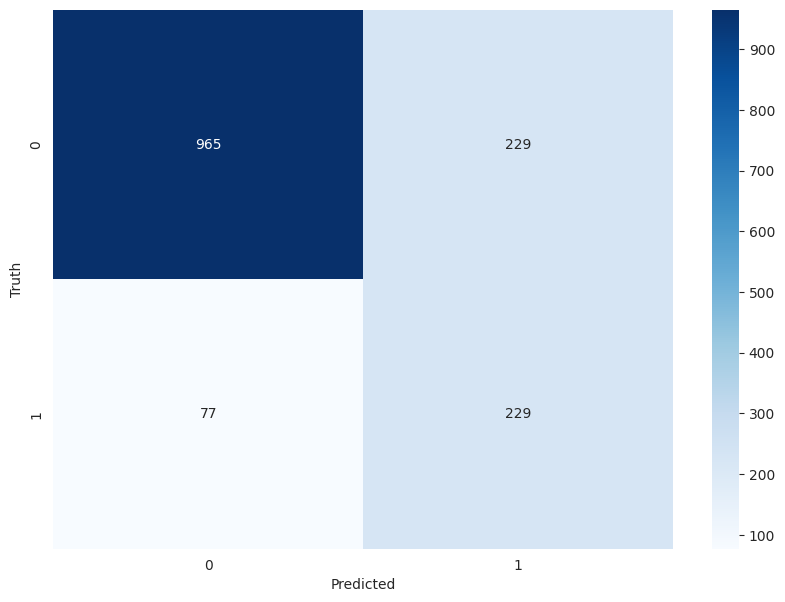

In [95]:
cm = tf.math. confusion_matrix(labels= y_test, predictions= y_pred)
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot= True, fmt= 'd', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [96]:
roc_auc_score(y_test, y_pred)

0.7782868591322627

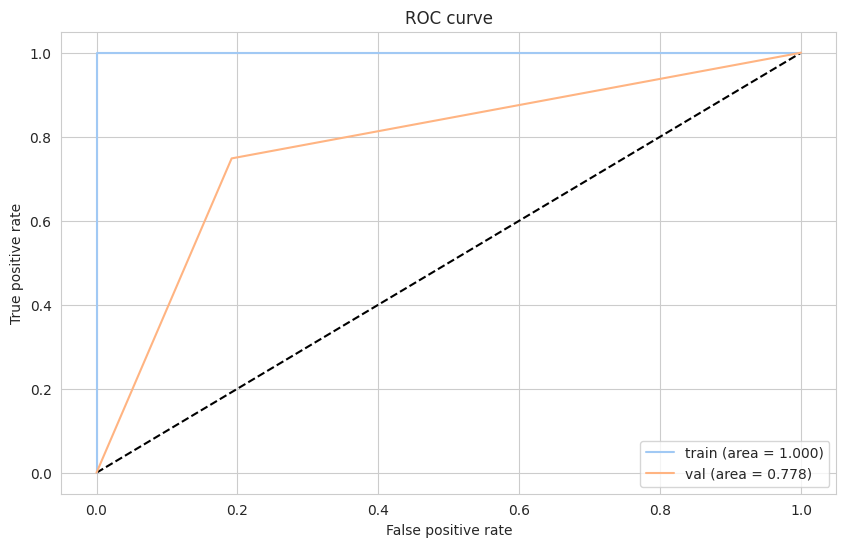

In [97]:
roc_auc_plot(y_train, y_train,y_test, y_pred)

### Add Dropout Layer

In [98]:
from tensorflow.keras.layers import Dropout

In [99]:
#tf.random.set_seed(42)

model = Sequential()

model.add(Dense(20, activation="relu", input_dim=X_train.shape[1]))
model.add(Dropout(0.1))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.02) # Itry 0.009, 0.05, 0.01 and 0.02
model.compile(optimizer=opt, loss="binary_crossentropy", metrics="Recall")

In [100]:
model.fit(x = X_train, y = y_train, validation_data=(X_val,y_val), batch_size = 64, epochs = 500, class_weight=class_weights)

Epoch 1/500
120/120 [==============================] - 2s 4ms/step - loss: 0.6489 - recall: 0.5841 - val_loss: 0.6157 - val_recall: 0.6647
Epoch 2/500
120/120 [==============================] - 0s 3ms/step - loss: 0.6014 - recall: 0.6284 - val_loss: 0.6034 - val_recall: 0.6763
Epoch 3/500
120/120 [==============================] - 0s 3ms/step - loss: 0.5749 - recall: 0.6386 - val_loss: 0.5870 - val_recall: 0.6879
Epoch 4/500
120/120 [==============================] - 0s 3ms/step - loss: 0.5517 - recall: 0.7105 - val_loss: 0.4239 - val_recall: 0.5665
Epoch 5/500
120/120 [==============================] - 0s 3ms/step - loss: 0.5368 - recall: 0.6958 - val_loss: 0.4220 - val_recall: 0.5318
Epoch 6/500
120/120 [==============================] - 0s 3ms/step - loss: 0.5286 - recall: 0.7137 - val_loss: 0.5051 - val_recall: 0.7052
Epoch 7/500
120/120 [==============================] - 0s 3ms/step - loss: 0.5204 - recall: 0.7003 - val_loss: 0.4746 - val_recall: 0.7168
Epoch 8/500
120/120 [======

In [101]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

loss  recall  val_loss  val_recall
0 0.649   0.584     0.616       0.665
1 0.601   0.628     0.603       0.676
2 0.575   0.639     0.587       0.688
3 0.552   0.711     0.424       0.566
4 0.537   0.696     0.422       0.532

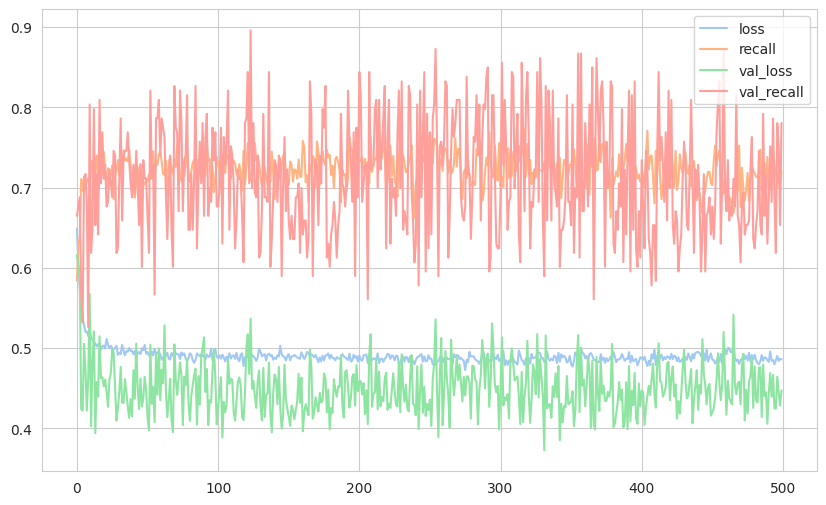

In [103]:
loss_df.plot()
plt.show()

In [104]:
y_preict = model.evaluate(X_test, y_test, verbose=0)

In [105]:
loss,Recall= model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", Recall)

loss:  0.4607783257961273
recall:  0.7810457348823547


In [106]:
print("Train")
y_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print("Test")
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("-------")

Train
240/240 [==============================] - 1s 3ms/step
[[4737 1355]
 [ 341 1217]]
              precision    recall  f1-score   support

           0       0.93      0.78      0.85      6092
           1       0.47      0.78      0.59      1558

    accuracy                           0.78      7650
   macro avg       0.70      0.78      0.72      7650
weighted avg       0.84      0.78      0.80      7650

Test
47/47 [==============================] - 0s 2ms/step
[[899 295]
 [ 67 239]]
              precision    recall  f1-score   support

           0       0.93      0.75      0.83      1194
           1       0.45      0.78      0.57       306

    accuracy                           0.76      1500
   macro avg       0.69      0.77      0.70      1500
weighted avg       0.83      0.76      0.78      1500

-------


Text(95.72222222222221, 0.5, 'Truth')

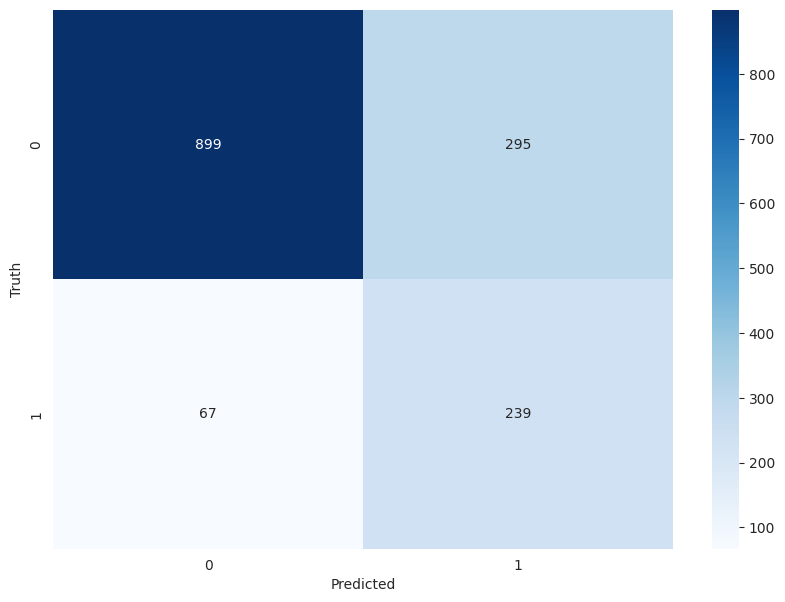

In [107]:
cm = tf.math. confusion_matrix(labels= y_test, predictions= y_pred)
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot= True, fmt= 'd', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [108]:
y_pred = model.predict(X_test)

47/47 [==============================] - 0s 3ms/step


In [109]:
y_train_pred = model.predict(X_train)

240/240 [==============================] - 0s 2ms/step


In [110]:
roc_auc_score(y_test, y_pred)

0.8539374432073221

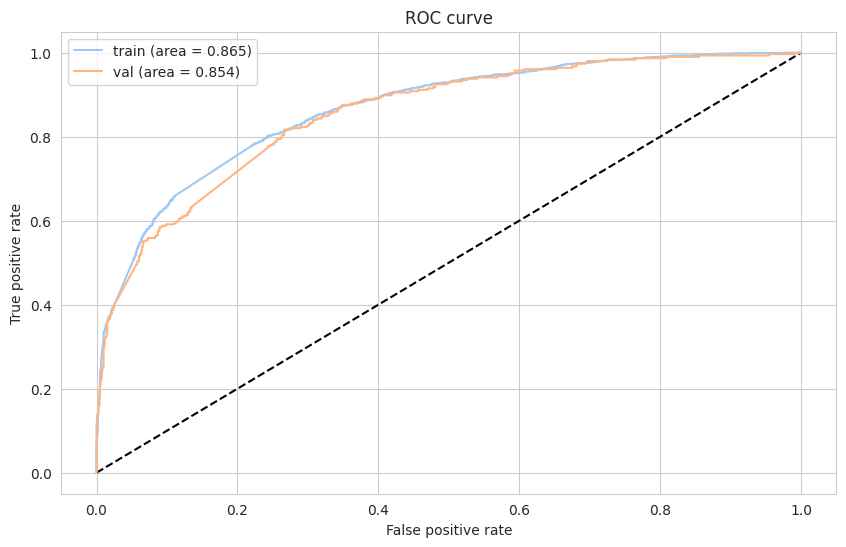

In [111]:
roc_auc_plot(y_train, y_train_pred,y_test, y_pred)

### Add Early Stop

In [112]:
from tensorflow.keras.callbacks import EarlyStopping

#### Monitor the "val_loss" as metric

In [113]:
#tf.random.set_seed(42)

model = Sequential()

model.add(Dense(20, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.02)
model.compile(optimizer=opt ,loss="binary_crossentropy",metrics="Recall")

In [114]:
early_stop = EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=15,restore_best_weights=True)

In [115]:
model.fit(x=X_train,y=y_train,validation_data=(X_val,y_val),batch_size=64,epochs=500,verbose=1,callbacks=[early_stop],)

Epoch 1/500
120/120 [==============================] - 2s 6ms/step - loss: 0.4672 - recall: 0.0096 - val_loss: 0.4386 - val_recall: 0.0000e+00
Epoch 2/500
120/120 [==============================] - 0s 3ms/step - loss: 0.4241 - recall: 0.2080 - val_loss: 0.4166 - val_recall: 0.2197
Epoch 3/500
120/120 [==============================] - 0s 3ms/step - loss: 0.4170 - recall: 0.2368 - val_loss: 0.4170 - val_recall: 0.2717
Epoch 4/500
120/120 [==============================] - 0s 3ms/step - loss: 0.4059 - recall: 0.2940 - val_loss: 0.3985 - val_recall: 0.3006
Epoch 5/500
120/120 [==============================] - 0s 3ms/step - loss: 0.3865 - recall: 0.3639 - val_loss: 0.3773 - val_recall: 0.3699
Epoch 6/500
120/120 [==============================] - 0s 3ms/step - loss: 0.3671 - recall: 0.4114 - val_loss: 0.3652 - val_recall: 0.5318
Epoch 7/500
120/120 [==============================] - 0s 3ms/step - loss: 0.3583 - recall: 0.4352 - val_loss: 0.3563 - val_recall: 0.3410
Epoch 8/500
120/120 [==

In [116]:
y_predic = model.evaluate(X_test, y_test, verbose=0)

In [117]:
loss,Recall= model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", Recall)

loss:  0.35271090269088745
recall:  0.4084967374801636


In [118]:
print("Train")
y_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print("Test")
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("-------")

Train
240/240 [==============================] - 1s 2ms/step
[[5939  153]
 [ 882  676]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      6092
           1       0.82      0.43      0.57      1558

    accuracy                           0.86      7650
   macro avg       0.84      0.70      0.74      7650
weighted avg       0.86      0.86      0.85      7650

Test
47/47 [==============================] - 0s 2ms/step
[[1159   35]
 [ 181  125]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1194
           1       0.78      0.41      0.54       306

    accuracy                           0.86      1500
   macro avg       0.82      0.69      0.73      1500
weighted avg       0.85      0.86      0.84      1500

-------


Text(95.72222222222221, 0.5, 'Truth')

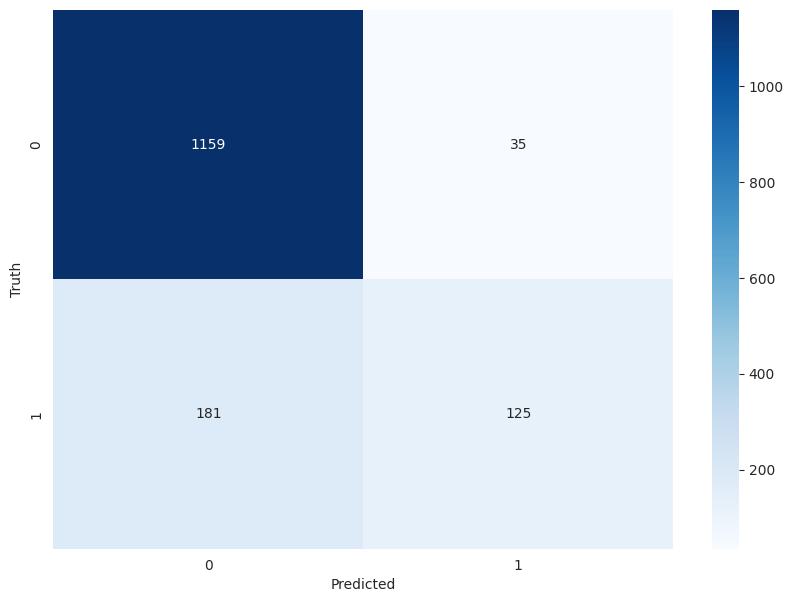

In [119]:
cm = tf.math. confusion_matrix(labels= y_test, predictions= y_pred)
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot= True, fmt= 'd', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [120]:
roc_auc_score(y_test, y_pred)

0.6895917495976615

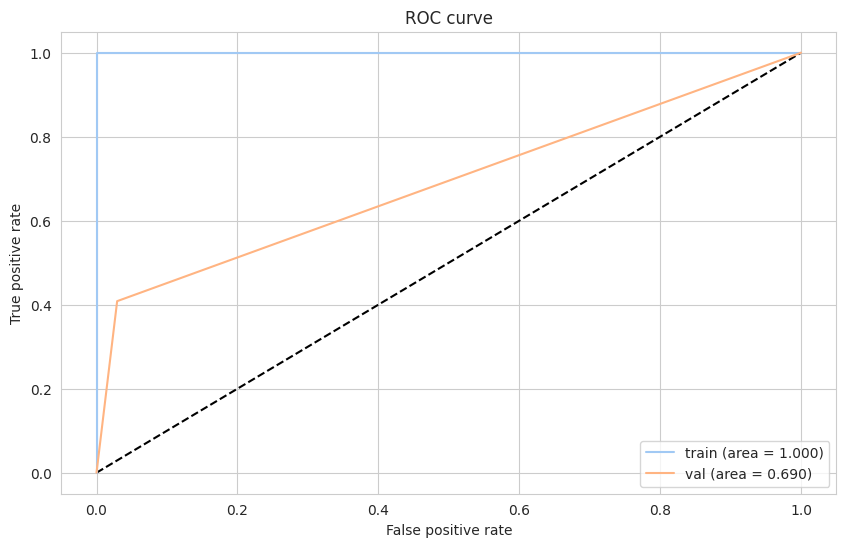

In [121]:
roc_auc_plot(y_train, y_train,y_test, y_pred)

#### Monitor the "val_recall" as metric

In [ ]:
#tf.random.set_seed(42)

model = Sequential()

model.add(Dense(20, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = Adam(learning_rate=0.02)

model.compile(optimizer=opt,loss="binary_crossentropy",metrics="Recall")

In [122]:
early_stop = EarlyStopping(monitor="val_recall",mode="max",verbose=1,patience=15,restore_best_weights=True)

In [123]:
model.fit(x=X_train,y=y_train,validation_data=(X_val,y_val),batch_size=64,epochs=500,verbose=1,callbacks=[early_stop],)

Epoch 1/500
120/120 [==============================] - 1s 4ms/step - loss: 0.3419 - recall: 0.4461 - val_loss: 0.3438 - val_recall: 0.4220
Epoch 2/500
120/120 [==============================] - 1s 4ms/step - loss: 0.3372 - recall: 0.4461 - val_loss: 0.3537 - val_recall: 0.4104
Epoch 3/500
120/120 [==============================] - 0s 4ms/step - loss: 0.3386 - recall: 0.4487 - val_loss: 0.3529 - val_recall: 0.3584
Epoch 4/500
120/120 [==============================] - 0s 3ms/step - loss: 0.3429 - recall: 0.4422 - val_loss: 0.3496 - val_recall: 0.3988
Epoch 5/500
120/120 [==============================] - 0s 3ms/step - loss: 0.3379 - recall: 0.4519 - val_loss: 0.3435 - val_recall: 0.4624
Epoch 6/500
120/120 [==============================] - 0s 3ms/step - loss: 0.3372 - recall: 0.4576 - val_loss: 0.3400 - val_recall: 0.4624
Epoch 7/500
120/120 [==============================] - 1s 5ms/step - loss: 0.3418 - recall: 0.4480 - val_loss: 0.3474 - val_recall: 0.3815
Epoch 8/500
120/120 [======

In [124]:
y_predic = model.evaluate(X_test, y_test, verbose=0)


In [125]:
loss,Recall= model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", Recall)

loss:  0.3780589699745178
recall:  0.5326797366142273


In [126]:
print("Train")
y_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print("Test")
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("-------")

Train
240/240 [==============================] - 0s 1ms/step
[[5675  417]
 [ 687  871]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      6092
           1       0.68      0.56      0.61      1558

    accuracy                           0.86      7650
   macro avg       0.78      0.75      0.76      7650
weighted avg       0.85      0.86      0.85      7650

Test
47/47 [==============================] - 0s 1ms/step
[[1094  100]
 [ 143  163]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1194
           1       0.62      0.53      0.57       306

    accuracy                           0.84      1500
   macro avg       0.75      0.72      0.74      1500
weighted avg       0.83      0.84      0.83      1500

-------


Text(95.72222222222221, 0.5, 'Truth')

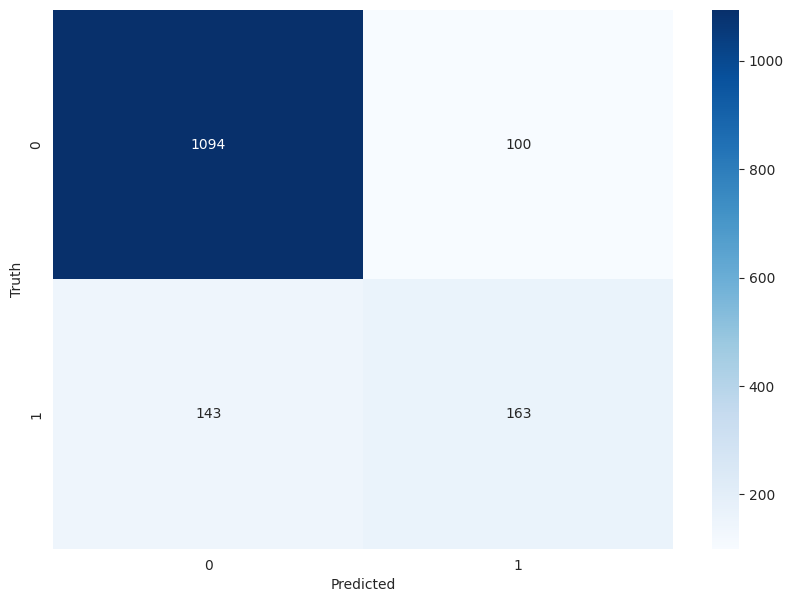

In [127]:
cm = tf.math. confusion_matrix(labels= y_test, predictions= y_pred)
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot= True, fmt= 'd', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [128]:
roc_auc_score(y_test, y_pred)

0.7244638223798732

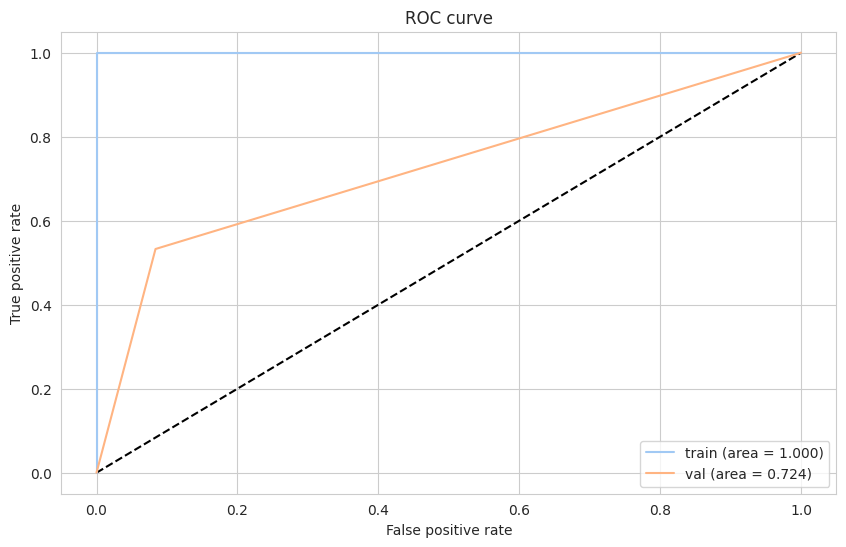

In [129]:
roc_auc_plot(y_train, y_train,y_test, y_pred)

## Optuna

In [130]:
pip install optuna

In [131]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna

In [132]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [133]:
trial_metric = "Recall"
batch_size = 64

def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    n_units3 = trial.suggest_int("n_units3", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1.3e-1, log = True)

    tf.random.set_seed(42)
    model = Sequential()
    model.add(Dense(n_units1,
                    input_dim=X_train.shape[1],
                    activation="relu"))
    model.add(Dense(n_units2,
                    activation="relu"))
    model.add(Dense(n_units3,
                    activation="relu"))
    model.add(Dense(1,
                    activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_float("w0", 0.01, 5 ,log = True)
    w1 = trial.suggest_float("w1", 0.01, 5 ,log = True)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=500,
        callbacks=[early_stop],
        class_weight={0: 0, 1: 2},
        verbose=0,
    )
    score = model.evaluate(X_train, y_train, verbose=0)[1]
    return score

In [134]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
study.best_params

[I 2023-10-30 19:54:06,694] A new study created in memory with name: no-name-38047cce-e118-404b-a310-264edf920a48


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 19:54:38,382] Trial 0 finished with value: 1.0 and parameters: {'n_units1': 77, 'n_units2': 75, 'n_units3': 33, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.10773871763480079, 'w0': 0.059065967423585775, 'w1': 0.1878415131321725}. Best is trial 0 with value: 1.0.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 19:54:51,356] Trial 1 finished with value: 0.385750949382782 and parameters: {'n_units1': 100, 'n_units2': 39, 'n_units3': 31, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0023871945589729678, 'w0': 0.44426449324703166, 'w1': 0.30447262798601715}. Best is trial 0 with value: 1.0.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 19:55:00,585] Trial 2 finished with value: 1.0 and parameters: {'n_units1': 35, 'n_units2': 12, 'n_units3': 50, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0002266726404372669, 'w0': 0.9451015871615641, 'w1': 3.875924524286879}. Best is trial 0 with value: 1.0.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 19:55:13,049] Trial 3 finished with value: 1.0 and parameters: {'n_units1': 86, 'n_units2': 58, 'n_units3': 22, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0008970850889408222, 'w0': 0.16024404513106189, 'w1': 0.09423289534285409}. Best is trial 0 with value: 1.0.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 19:55:19,269] Trial 4 finished with value: 1.0 and parameters: {'n_units1': 116, 'n_units2': 58, 'n_units3': 56, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 2.7466449106948537e-05, 'w0': 0.048367244604939075, 'w1': 2.556189136996363}. Best is trial 0 with value: 1.0.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 19:55:28,147] Trial 5 finished with value: 1.0 and parameters: {'n_units1': 13, 'n_units2': 108, 'n_units3': 9, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.11265513937580793, 'w0': 0.041825070196577836, 'w1': 0.9677210614303776}. Best is trial 0 with value: 1.0.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 19:55:36,295] Trial 6 finished with value: 1.0 and parameters: {'n_units1': 93, 'n_units2': 98, 'n_units3': 32, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.0006355258519631607, 'w0': 0.05005920624802054, 'w1': 1.1352643301605454}. Best is trial 0 with value: 1.0.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 19:55:42,911] Trial 7 finished with value: 1.0 and parameters: {'n_units1': 24, 'n_units2': 119, 'n_units3': 83, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.001183054687413618, 'w0': 0.10468973473701593, 'w1': 0.7306476913818643}. Best is trial 0 with value: 1.0.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 19:55:50,715] Trial 8 finished with value: 1.0 and parameters: {'n_units1': 79, 'n_units2': 86, 'n_units3': 125, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 9.130284970298307e-05, 'w0': 0.7137320062905979, 'w1': 2.0497366111367095}. Best is trial 0 with value: 1.0.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 19:55:57,843] Trial 9 finished with value: 1.0 and parameters: {'n_units1': 105, 'n_units2': 117, 'n_units3': 37, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 9.126842251682122e-05, 'w0': 2.1293655683730184, 'w1': 0.33899251407767067}. Best is trial 0 with value: 1.0.


{'n_units1': 77,
 'n_units2': 75,
 'n_units3': 33,
 'optimizer': keras.src.optimizers.nadam.Nadam,
 'learning_rate': 0.10773871763480079,
 'w0': 0.059065967423585775,
 'w1': 0.1878415131321725}

In [135]:
# build model with optuna parameters
unit1, unit2, unit3, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["n_units3"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)
tf.random.set_seed(42)
model = Sequential()
model.add(Dense(unit1,  activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(unit3, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall","accuracy"])

# train model
model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=500,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/500
120/120 [==============================] - 4s 5ms/step - loss: 0.4858 - recall: 0.0700 - accuracy: 0.7897 - val_loss: 0.4667 - val_recall: 0.0000e+00 - val_accuracy: 0.7965
Epoch 2/500
120/120 [==============================] - 0s 3ms/step - loss: 0.4204 - recall: 0.2067 - accuracy: 0.8038 - val_loss: 0.4079 - val_recall: 0.3064 - val_accuracy: 0.8188
Epoch 3/500
120/120 [==============================] - 0s 4ms/step - loss: 0.3983 - recall: 0.3736 - accuracy: 0.8233 - val_loss: 0.3842 - val_recall: 0.3584 - val_accuracy: 0.8435
Epoch 4/500
120/120 [==============================] - 0s 4ms/step - loss: 0.3863 - recall: 0.3922 - accuracy: 0.8404 - val_loss: 0.4509 - val_recall: 0.6012 - val_accuracy: 0.8118
Epoch 5/500
120/120 [==============================] - 0s 4ms/step - loss: 0.3884 - recall: 0.3960 - accuracy: 0.8323 - val_loss: 0.3918 - val_recall: 0.2890 - val_accuracy: 0.8471
Epoch 6/500
120/120 [==============================] - 1s 4ms/step - loss: 0.3837 - recall:

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [136]:
history = model.history.history

In [137]:
optuna.visualization.plot_optimization_history(study)

In [138]:
print("Train")
y_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print("Test")
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("-------")

Train
240/240 [==============================] - 1s 3ms/step
[[6031   61]
 [1066  492]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      6092
           1       0.89      0.32      0.47      1558

    accuracy                           0.85      7650
   macro avg       0.87      0.65      0.69      7650
weighted avg       0.86      0.85      0.82      7650

Test
47/47 [==============================] - 0s 5ms/step
[[1179   15]
 [ 215   91]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1194
           1       0.86      0.30      0.44       306

    accuracy                           0.85      1500
   macro avg       0.85      0.64      0.68      1500
weighted avg       0.85      0.85      0.82      1500

-------


Text(95.72222222222221, 0.5, 'Truth')

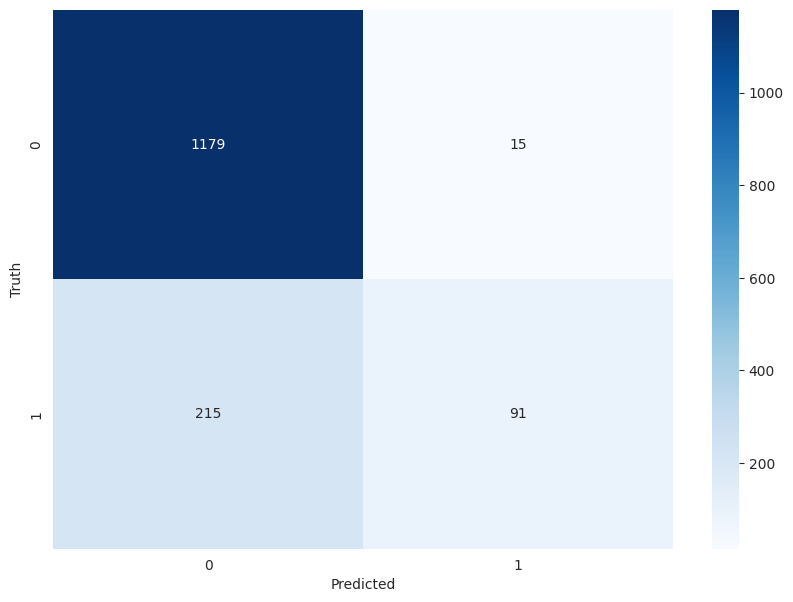

In [139]:
cm = tf.math. confusion_matrix(labels= y_test, predictions= y_pred)
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot= True, fmt= 'd', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [140]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.6424114034223405

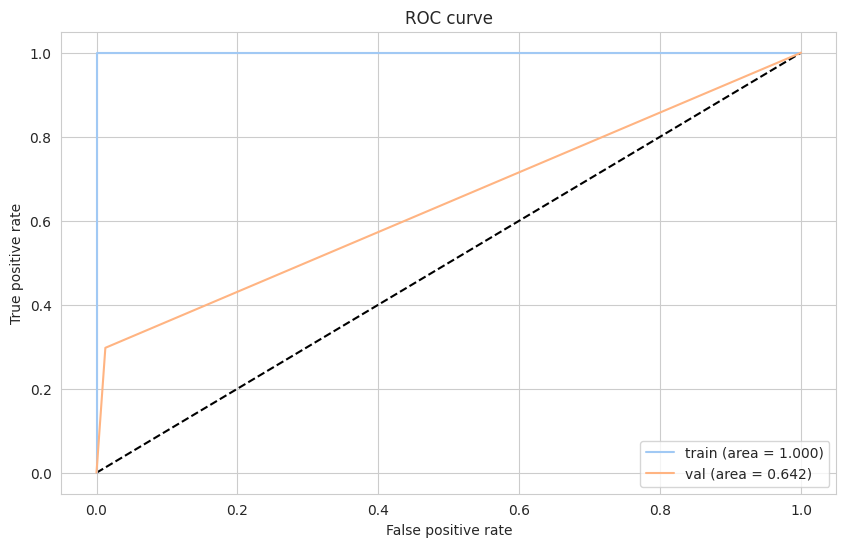

In [141]:
roc_auc_plot(y_train, y_train,y_test, y_pred)

# Final Model and Model Deployment

In [142]:
import pickle
from tensorflow.keras.models import load_model

In [143]:
pickle.dump(column_trans, open("column_trans_ANN", "wb"))

In [144]:
X = df.drop('Exited', axis = 1)
y = df['Exited'].values

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.1,
                                                    random_state=42)

In [146]:
X_train = column_trans.fit_transform (X_train)
X_test = column_trans.transform (X_test)

In [147]:
study.best_params

{'n_units1': 77,
 'n_units2': 75,
 'n_units3': 33,
 'optimizer': keras.src.optimizers.nadam.Nadam,
 'learning_rate': 0.10773871763480079,
 'w0': 0.059065967423585775,
 'w1': 0.1878415131321725}

In [148]:
model = Sequential()

model.add(Dense(77, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(75, activation="relu"))
model.add(Dense(33, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

optimizer = Nadam(learning_rate=0.10773871763480079)

model.compile(optimizer=optimizer,
              loss="binary_crossentropy",
              metrics=["Recall"])

In [150]:
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test),
          callbacks=[early_stop],
          batch_size=64,
          epochs=500,
          verbose=1,
          class_weight={0: 0.059065967423585775, 1:0.1878415131321725})

Epoch 1/500
141/141 [==============================] - 1s 6ms/step - loss: 0.0466 - recall: 0.6432 - val_loss: 0.5071 - val_recall: 0.6127
Epoch 2/500
141/141 [==============================] - 1s 6ms/step - loss: 0.0452 - recall: 0.6874 - val_loss: 0.5273 - val_recall: 0.7059
Epoch 3/500
141/141 [==============================] - 1s 6ms/step - loss: 0.0452 - recall: 0.6836 - val_loss: 0.5710 - val_recall: 0.8284
Epoch 4/500
141/141 [==============================] - 1s 4ms/step - loss: 0.0444 - recall: 0.6787 - val_loss: 0.5217 - val_recall: 0.7892
Epoch 5/500
141/141 [==============================] - 1s 6ms/step - loss: 0.0438 - recall: 0.6721 - val_loss: 0.4632 - val_recall: 0.3186
Epoch 6/500
141/141 [==============================] - 1s 6ms/step - loss: 0.0435 - recall: 0.6623 - val_loss: 0.4753 - val_recall: 0.5294
Epoch 7/500
141/141 [==============================] - 1s 5ms/step - loss: 0.0458 - recall: 0.6678 - val_loss: 0.4049 - val_recall: 0.5196
Epoch 8/500
141/141 [======

In [151]:
print("Train")
y_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print("-------")
print("Test")
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Train
282/282 [==============================] - 1s 2ms/step
[[6234  933]
 [ 648 1185]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      7167
           1       0.56      0.65      0.60      1833

    accuracy                           0.82      9000
   macro avg       0.73      0.76      0.74      9000
weighted avg       0.84      0.82      0.83      9000

-------
Test
32/32 [==============================] - 0s 2ms/step
[[684 112]
 [ 78 126]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       796
           1       0.53      0.62      0.57       204

    accuracy                           0.81      1000
   macro avg       0.71      0.74      0.72      1000
weighted avg       0.82      0.81      0.82      1000



In [152]:
loss,Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", Recall)

loss:  0.38987621665000916
recall:  0.6176470518112183


In [153]:
model.save("Classification_with_ANN_Churn_Prediction.h5")

## Prediction

In [155]:
customer = [619 ,0 , 42 , 2 , 0, 1, 1 ,1 , 101349 , 1 ,0 , 0]
customer = np.array([customer])
MinMax_Scaler.fit_transform(customer)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [156]:
pred = model.predict(customer)

if pred[0] == 1:
    print('customer will leave')
else:
    print('Faithful customer')

1/1 [==============================] - 0s 83ms/step
customer will leave


In [157]:
pred

array([[1.]], dtype=float32)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___